In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from scipy.stats import zscore
from sklearn.preprocessing  import power_transform, StandardScaler
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.linear_model import LogisticRegression,LinearRegression, SGDRegressor,Ridge, Lasso
from sklearn.metrics import roc_curve, auc, roc_auc_score, r2_score, classification_report, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor 
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.svm import SVR
import pickle
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("database_IND.csv")

In [3]:
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [5]:
df.shape

(907, 27)

In [6]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [7]:
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

In [8]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

Observation:
Null values are present in our dataset

column "other_fuel2" have 906 out of 907, so we will drop this column as we can not take mode of it.
column "other_fuel3" contains only null value data, so we will drop this column as it have no realtion with our target column.
column "wepp_id" contains only null value data, so we will drop this column as it have no realtion with our target column.
column "generation_gwh_2013" contains only null value data, so we will drop this column as it have no realtion with our target column.
column "generation_gwh_2019" contains only null value data, so we will drop this column as it have no realtion with our target column.
column "estimated_generation_gwh" contains only null value data, so we will drop this column as it have no realtion with our target column.
We will handle rest column containing null value with mean, mode etc.

<AxesSubplot:>

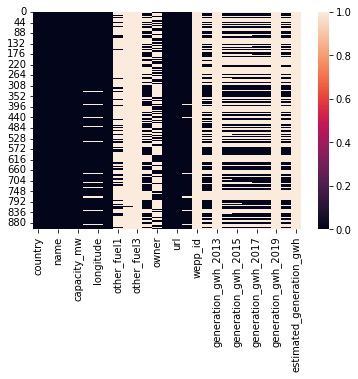

In [9]:
sns.heatmap(df.isnull())

Here, we can see there is Null Values present in 19 columns: latitude, longitude, other_fuel1, other_fuel2, other_fuel3, commissioning_year, owner, geolocation_source, wepp_id, year_of_capacity_data, generation_gwh_2013, generation_gwh_2014, generation_gwh_2015, generation_gwh_2016, generation_gwh_2017, generation_gwh_2018, generation_gwh_2019, generation_data_source, estimated_generation_gwh

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [12]:
df[df['primary_fuel'] == ''].index

Int64Index([], dtype='int64')

In [13]:
df[df['capacity_mw'] == ''].index

Int64Index([], dtype='int64')

In [14]:
#  we can see there are no blank value present in our both Target Column

In [15]:
# is dataset contains any space
df.loc[df['primary_fuel']==" "]

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh


In [16]:
df.loc[df['capacity_mw']==" "]

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh


In [17]:
# So we can see there are no spaces present in the dataset.



In [19]:
# Checking unique values present in the Target Variable.
df['primary_fuel'].unique()

array(['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil',
       'Nuclear'], dtype=object)

In [20]:
df['capacity_mw'].unique()

array([2.50000e+00, 9.80000e+01, 3.92000e+01, 1.35000e+02, 1.80000e+03,
       2.50000e+02, 6.00000e+01, 1.92000e+02, 2.90000e+02, 2.10000e+02,
       1.35000e+03, 1.34000e+02, 1.20000e+03, 1.69500e+01, 9.00000e+00,
       2.63000e+03, 4.19330e+02, 6.00000e+02, 1.00000e+01, 1.70000e+01,
       2.40000e+01, 6.52000e+02, 4.60000e+01, 5.00000e+01, 1.00000e+00,
       1.65000e+01, 1.13600e+02, 1.98000e+01, 1.32000e+01, 5.00000e+00,
       7.05000e+02, 2.80000e+01, 4.50000e+02, 1.80000e+02, 1.05000e+03,
       5.10000e+02, 6.75000e+01, 3.00000e+02, 3.35000e+02, 1.20000e+01,
       3.15000e+02, 3.00000e+01, 2.00000e+01, 4.20000e+01, 7.20000e+02,
       9.00000e+01, 1.32000e+03, 1.20000e+02, 6.60000e+01, 2.70000e+02,
       2.28000e+01, 1.50000e+01, 2.52000e+01, 1.80000e+01, 1.70000e+03,
       2.60000e+01, 4.10000e+01, 1.37900e+03, 3.40000e+01, 1.60000e+01,
       5.00000e+02, 8.00000e+01, 7.50000e+01, 1.21000e+03, 9.90000e+01,
       6.96000e+01, 6.00000e+00, 7.50000e+02, 4.00000e+01, 1.650

In [21]:
df['primary_fuel'].nunique()

8

In [22]:
df['capacity_mw'].nunique()

361

In [23]:
df['primary_fuel'].value_counts()

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64

In [24]:
df['capacity_mw'].value_counts()

5.0       39
10.0      22
600.0     20
15.0      20
1200.0    19
          ..
291.0      1
645.0      1
41.4       1
17.5       1
106.6      1
Name: capacity_mw, Length: 361, dtype: int64

In [25]:
#  Data Cleaning and preprocessing
#  there are Null values in the dataset, so we need to treat them.

In [26]:
#  Handling Null Values

In [27]:
#Filling Null Values of "latitude" column in dataset by mean value
df["latitude"].fillna(df["latitude"].mean(), inplace=True)

In [28]:
#Filling Null Values of "longitude" column in dataset by mean value
df["longitude"].fillna(df["longitude"].mean(), inplace=True)

In [29]:
#checking all values of column 'other_fuel1'
df["other_fuel1"].unique() 

array([nan, 'Oil', 'Cogeneration', 'Gas'], dtype=object)

In [30]:
#checking repeated values in "other_fuel1" column through mode
print( df["other_fuel1"].mode())

0    Oil
dtype: object


In [31]:
#Droping column 'other_fuel1' as it have only one type of value that is 'Oil' and  it have no relation with our Target column
df=df.drop(columns="other_fuel1", axis=1)

In [32]:
#Droping "other_fuel2 " column from dataset because most of the values (906) are missing and we can not take mean, mode etc of it as our total data is 907. So, we will drop this column.
df=df.drop(columns="other_fuel2", axis=1)

In [33]:
#Droping "other_fuel3" column from dataset because all values (907) are missing. So, we will drop this column.
df=df.drop(columns="other_fuel3", axis=1)

In [34]:
#checking all values of column 'commissioning_year'
df["commissioning_year"].unique()

array([2011.,   nan, 2004., 2015., 2005., 1970., 2010., 2008., 2014.,
       1985., 1986., 1987., 2000., 1989., 2017., 1977., 1980., 2003.,
       1984., 1976., 1996., 1991., 2002., 2001., 2006., 2007., 1988.,
       1973., 2012., 1968., 1964., 2016., 2013., 1962., 1998., 1993.,
       1997., 1999., 1994., 1975., 1992., 1972., 1979., 1967., 1995.,
       1983., 1981., 2018., 1959., 1961., 1957., 1978., 1963., 1971.,
       1955., 2009., 1966., 1965., 1960., 1949., 1952., 1990., 1982.,
       1937., 1956., 1946., 1958., 1943., 1954., 1969., 1939., 1927.,
       1974., 1953.])

In [35]:
#Filling Null Values of "commissioning_year" column in dataset by mean value
df["commissioning_year"].fillna(df["commissioning_year"].mean(), inplace=True)

In [36]:
#checking all values of column 'owner'
df["owner"].unique()

array(['Solar Paces', 'Ultratech Cement ltd', 'AES', nan,
       'Hindustan Pvt lt', 'Dr Ssk ltd', 'Ashok Ssk ltd',
       'Shree Sugars ltd', 'Ener-t International Ltd.',
       'Nav Bharat Buildcon Private Limited', 'MEIL Green Power Limited',
       'Madras Cement Limited',
       'DDE Renewable Energy Private Limited (DREPL)',
       'Electromech Maritech Private Limited',
       'Finehope Allied Engineering Private Limited',
       'Khaya Solar Projects Private Limited',
       'Newton Solar Private Limited', 'Saidham Overseas Private Limited',
       'Vasavi Solar Power Private Limited', 'Indian Power ltd',
       'Ballarpur Industries ltd', 'Jk Cement ltd', 'India Ltd icl)',
       'Bharat Petroleum Corporation Limited', 'Bhilwara Energy Limited',
       'Ideal Projects ltd', 'Ugar Works ltd', 'Vishwanath Sugars ltd',
       'Hothur Pvt ltd', 'Janki Corp ltd', 'Mysore Mills ltd',
       'Sunflag Co ltd', 'Varam Pvt ltd', 'Sangam Spinners ltd',
       'Bharat Refinery ltd', 'Bina

In [37]:
#checking repeated values in "owner" column through mode
print(df["owner"].mode())

0                      Acc Acc ltd
1                    Jk Cement ltd
2    Sterling Agro Industries ltd.
dtype: object


In [38]:
#Droping "owner" column from dataset because this column's data have no relation with our Target Column. 
df=df.drop(columns="owner", axis=1)

In [43]:
#checking all values of column 'geolocation_source'
df["geolocation_source"].unique() 

array(['National Renewable Energy Laboratory', 'WRI', nan,
       'Industry About'], dtype=object)

In [44]:
#checking repeated values in "geolocation_source" column through mode
print(df["geolocation_source"].mode())

0    WRI
dtype: object


In [45]:
#Filling Null Values of "geolocation_source" column in dataset by mode value
df["geolocation_source"].fillna(df["geolocation_source"].mode()[0], inplace=True)

In [46]:
#Droping "wepp_id" column from dataset because all values (907) are missing. So, we will drop this column.
df=df.drop(columns="wepp_id", axis=1)

In [47]:
#Filling Null Values of "year_of_capacity_data" column in dataset by mean value
df["year_of_capacity_data"].fillna(df["year_of_capacity_data"].mean(), inplace=True)

In [48]:
#Droping "generation_gwh_2013" column from dataset because all values (907) are missing. So, we will drop this column.
df=df.drop(columns="generation_gwh_2013", axis=1)

In [49]:
#Filling Null Values of "generation_gwh_2014" column in dataset by mode value
df["generation_gwh_2014"].fillna(df["generation_gwh_2014"].mean(), inplace=True)

In [50]:
#Filling Null Values of "generation_gwh_2015" column in dataset by mode value
df["generation_gwh_2015"].fillna(df["generation_gwh_2015"].mean(), inplace=True)

In [51]:
#Filling Null Values of "generation_gwh_2016" column in dataset by mode value
df["generation_gwh_2016"].fillna(df["generation_gwh_2016"].mean(), inplace=True)

In [52]:
#Filling Null Values of "generation_gwh_2017" column in dataset by mode value
df["generation_gwh_2017"].fillna(df["generation_gwh_2017"].mean(), inplace=True)

In [53]:
#Filling Null Values of "generation_gwh_2018" column in dataset by mode value
df["generation_gwh_2018"].fillna(df["generation_gwh_2018"].mean(), inplace=True)

In [54]:
#Droping "generation_gwh_2019" column from dataset because all values (907) are missing. So, we will drop this column.
df=df.drop(columns="generation_gwh_2019", axis=1)

In [55]:
#checking all values of column 'generation_data_source'
df["generation_data_source"].unique() 

array([nan, 'Central Electricity Authority'], dtype=object)

In [56]:
#Droping "generation_data_source" column from dataset.
df=df.drop(columns="generation_data_source", axis=1)

In [57]:
#Droping "estimated_generation_gwh" column from dataset because all values (907) are missing. So, we will drop this column.
df=df.drop(columns="estimated_generation_gwh", axis=1)

In [58]:
#  Again Checking for Null Values after Handling it
df.isnull().sum()

country                  0
country_long             0
name                     0
gppd_idnr                0
capacity_mw              0
latitude                 0
longitude                0
primary_fuel             0
commissioning_year       0
source                   0
url                      0
geolocation_source       0
year_of_capacity_data    0
generation_gwh_2014      0
generation_gwh_2015      0
generation_gwh_2016      0
generation_gwh_2017      0
generation_gwh_2018      0
dtype: int64

<AxesSubplot:>

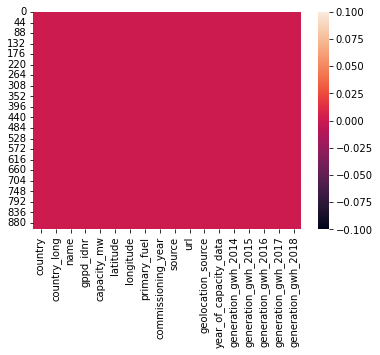

In [59]:
sns.heatmap(df.isnull())

In [60]:
#So, now we can check there is no null values in our dataset.

In [61]:
#total Columns after handling null values
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'commissioning_year', 'source',
       'url', 'geolocation_source', 'year_of_capacity_data',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018'],
      dtype='object')

In [65]:
#total Columns after handling null values
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'commissioning_year', 'source',
       'url', 'geolocation_source', 'year_of_capacity_data',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018'],
      dtype='object')

In [66]:
#total Rows and Columns after handling null values
df.shape

(907, 18)

In [67]:
# Descriptive Statistics
# Description of Dataset : works only on continuous column 
df.describe()

,capacity_mw,latitude,longitude,commissioning_year,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,907.000000,907.000000,907.000000,907.000000,907.0,907.000000,907.000000,907.000000,907.000000,907.000000
mean,326.223755,21.197918,77.464907,1997.091082,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
std,590.085456,6.079148,4.812291,13.016360,0.0,2665.338608,2859.349132,2877.890004,2921.502193,3030.808041
min,0.000000,8.168900,68.644700,1927.000000,2019.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.725000,17.072000,74.388900,1997.091082,2019.0,1211.362750,916.000000,896.500214,882.594850,824.842340
50%,59.200000,21.281800,76.979200,1997.091082,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
75%,385.250000,25.176450,79.206100,2003.000000,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
max,4760.000000,34.649000,95.408000,2018.000000,2019.0,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000


In [68]:
#We can check that 10 columns contains Continuous data: capacity_mw, latitude, longitude, commissioning_year, year_of_capacity_data, generation_gwh_2014, generation_gwh_2015, generation_gwh_2016, generation_gwh_2017, generation_gwh_2018

    
#And 9 columns contains Categorical data: 'country', 'country_long', 'name', 'gppd_idnr','primary_fuel', 'owner', 'source', 'url', 'geolocation_source'.
#Here also we can see that there is no null value in aur dataset as count is 907 in each column.

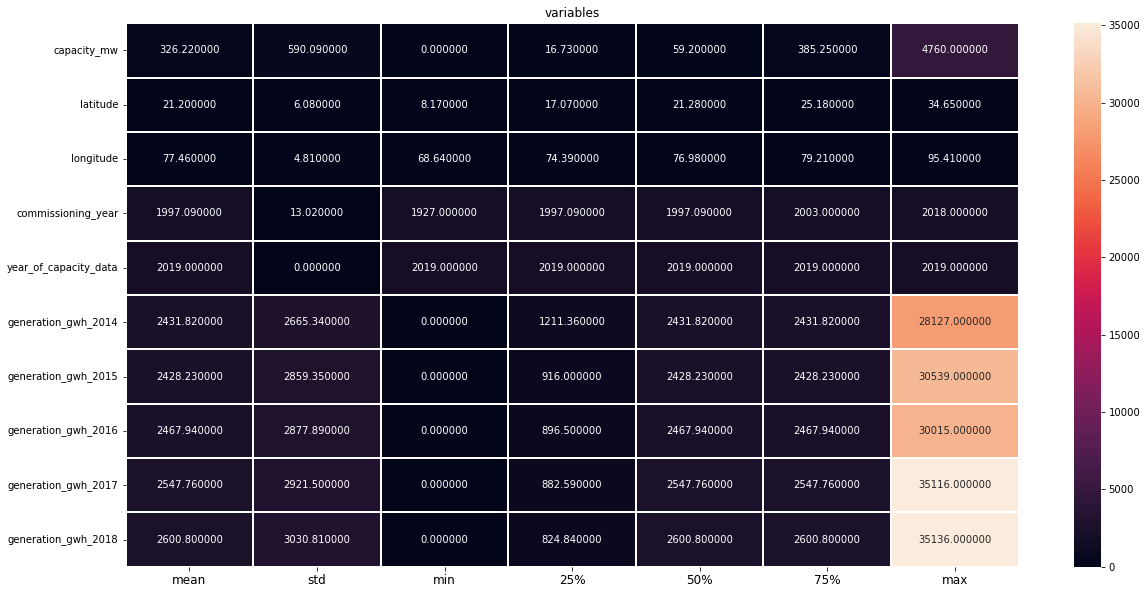

In [69]:
# Checking Description through heatmap also.
plt.figure(figsize=(20,10))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt='f')
plt.xticks(fontsize=18)
plt.xticks(fontsize=12)
plt.title('variables')
plt.show()

Outcome of Describe of Datasets:
Value of Std is higher than mean which shows skewness is present in most columns, we will check for skewness later.
We can see difference between 25% and 50% in columns ('generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017' and 'generation_gwh_2018') are more compare to it's 50% and 75% (difference is 0), which shows outliers are present.
difference between 25% and 50% in columns 'commissioning_year'is 0 and it's 50% and 75% (high difference), which shows outliers are present in it.
Also in column "capacity_mw" difference is high between 50% and 75% compare to difference between 25% and 50%, which shows outliers are present in it.
year_of_capacity_data have only one type of data, which means it have no relation with our target column, so we will drop this column also.

In [70]:
df["year_of_capacity_data"].unique

<bound method Series.unique of 0      2019.0
1      2019.0
2      2019.0
3      2019.0
4      2019.0
        ...  
902    2019.0
903    2019.0
904    2019.0
905    2019.0
906    2019.0
Name: year_of_capacity_data, Length: 907, dtype: float64>

In [71]:
#Droping column 'year_of_capacity_data' as it have only one type of value that is '2019' and thus it have no relation with our Target column
df=df.drop(columns="year_of_capacity_data", axis=1)

In [72]:
# checking total Columns after droping column "year_of_capacity_data"
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'commissioning_year', 'source',
       'url', 'geolocation_source', 'generation_gwh_2014',
       'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017',
       'generation_gwh_2018'],
      dtype='object')

In [73]:
df["gppd_idnr"].value_counts()

WRI1020239    1
IND0000356    1
IND0000346    1
IND0000523    1
WRI1019978    1
             ..
IND0000167    1
IND0000168    1
IND0000169    1
IND0000170    1
WRI1026761    1
Name: gppd_idnr, Length: 907, dtype: int64

In [74]:
#Droping column 'gppd_idnr' as it have no relation with our Target column
df=df.drop(columns="gppd_idnr", axis=1)

In [75]:
df["country"].value_counts()

IND    907
Name: country, dtype: int64

In [76]:
#Droping column 'country' as it have only one type of value that is 'IND' and thus it have no relation with our Target column
df=df.drop(columns="country", axis=1)

In [77]:
df["country_long"].value_counts()

India    907
Name: country_long, dtype: int64

In [78]:
#Droping column 'country_long' as it have only one type of value that is 'India' and thus it have no relation with our Target column
df=df.drop(columns="country_long", axis=1)

In [80]:
df["name"].value_counts()

ACME Solar Tower           1
RAICHUR                    1
PRYAGRAJ (BARA) TPP        1
PULICHINTALA               1
PUNE MILL                  1
                          ..
KADANA                     1
KADRA                      1
KAHALGAON                  1
KAIGA                      1
iEnergy Theni Wind Farm    1
Name: name, Length: 907, dtype: int64

In [81]:
#Droping column 'gppd_idnr' as it have no relation with our Target column
df=df.drop(columns="name", axis=1)

In [82]:
df["source"].value_counts()

Central Electricity Authority                                  519
CDM                                                            124
Lancosola                                                       10
National Renewable Energy Laboratory                             8
National Thermal Power Corporation (NTPC)                        6
                                                              ... 
Harsha Engineers Limited                                         1
Godawari Energy ltd                                              1
Sunkon Energy Private Limited                                    1
West Bengal Energy Development Corporation Limited (WBEDCL)      1
Yashwantrao Krishna ssk                                          1
Name: source, Length: 191, dtype: int64

In [83]:
#Droping column 'source' as it have no relation with our Target column
df=df.drop(columns="source", axis=1)

In [84]:
df["url"].value_counts()

http://www.cea.nic.in/                                                              519
http://www.lancosolar.com/pdfs/rajasthan-pv-project-details.pdf                       7
http://www.ntpc.co.in                                                                 6
http://viainfotech.biz/Biomass/theme5/document/green_market/REC-project-list.pdf      5
http://www.mahaurja.com/PDF/PG2_GridConnSPPCommissioned.pdf                           4
                                                                                   ... 
https://cdm.unfccc.int/Projects/DB/LRQA%20Ltd1346322352.66/view                       1
https://cdm.unfccc.int/Projects/DB/DNV-CUK1351166669.28/view                          1
http://harshaengineers.com                                                            1
http://hiragroup.com/companies/godawari-green-energy-limited/                         1
https://cdm.unfccc.int/Projects/DB/RWTUV1345031355.85/view                            1
Name: url, Length: 304, dtype: i

In [85]:
#Droping column 'url' as it have no relation with our Target column
df=df.drop(columns="url", axis=1)

In [86]:
df["geolocation_source"].value_counts()

WRI                                     784
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64

In [87]:
df.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel',
       'commissioning_year', 'geolocation_source', 'generation_gwh_2014',
       'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017',
       'generation_gwh_2018'],
      dtype='object')

In [88]:
    # checking total Rows and Columns after droping column "year_of_capacity_data"
    df.shape

(907, 11)

In [89]:
df.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,Solar,2011.000000,National Renewable Energy Laboratory,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
1,98.0,24.7663,74.6090,Coal,1997.091082,WRI,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
2,39.2,21.9038,69.3732,Wind,1997.091082,WRI,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
3,135.0,23.8712,91.3602,Gas,2004.000000,WRI,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,Coal,2015.000000,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000


In [90]:
df.dtypes

capacity_mw            float64
latitude               float64
longitude              float64
primary_fuel            object
commissioning_year     float64
geolocation_source      object
generation_gwh_2014    float64
generation_gwh_2015    float64
generation_gwh_2016    float64
generation_gwh_2017    float64
generation_gwh_2018    float64
dtype: object

In [91]:
 #  Data Visualization
#  Using Countplot for categorical columns

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64


<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

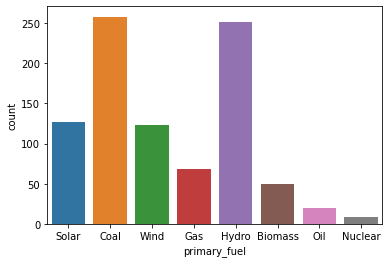

In [92]:
#Count Plot for "primary_fuel" column
print(df["primary_fuel"].value_counts())
sns.countplot("primary_fuel",data=df)

Coal is used most as primary_fuel and Nuclear as least

WRI                                     784
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64


<AxesSubplot:xlabel='geolocation_source', ylabel='count'>

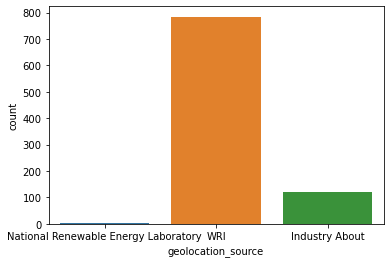

In [93]:
#Count Plot for "geolocation_source" column
print(df["geolocation_source"].value_counts())
sns.countplot("geolocation_source",data=df)

In [94]:
#  'WRI' is used more as geolocation_source then 'Industry About' and then 'National Renewable Energy Laboratory'

In [95]:
#   Using Histplot for continuous columns

5.0       39
10.0      22
600.0     20
15.0      20
1200.0    19
          ..
291.0      1
645.0      1
41.4       1
17.5       1
106.6      1
Name: capacity_mw, Length: 361, dtype: int64


<AxesSubplot:xlabel='capacity_mw', ylabel='Count'>

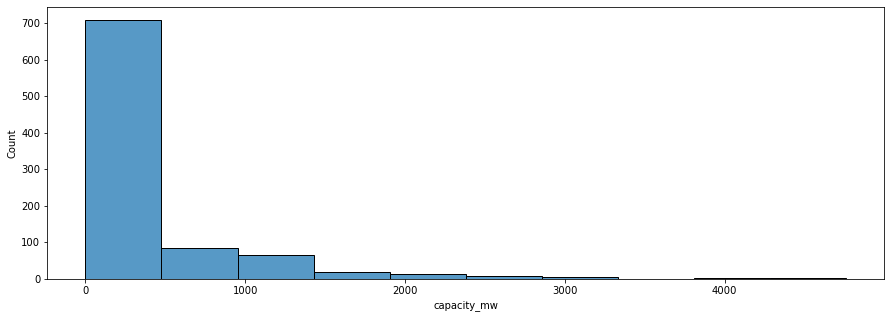

In [96]:
#Histplot for "capacity_mw" column
print(df["capacity_mw"].value_counts())
plt.figure(figsize=(15,5))
sns.histplot(x='capacity_mw',data=df,bins=10)

In [97]:
#  capacity_mw between 0 to 500 is highest.

21.197918    46
19.000400     3
24.191700     3
31.268000     2
14.235200     2
             ..
22.755400     1
27.159800     1
17.297000     1
20.877200     1
9.934400      1
Name: latitude, Length: 837, dtype: int64


<AxesSubplot:xlabel='latitude', ylabel='Count'>

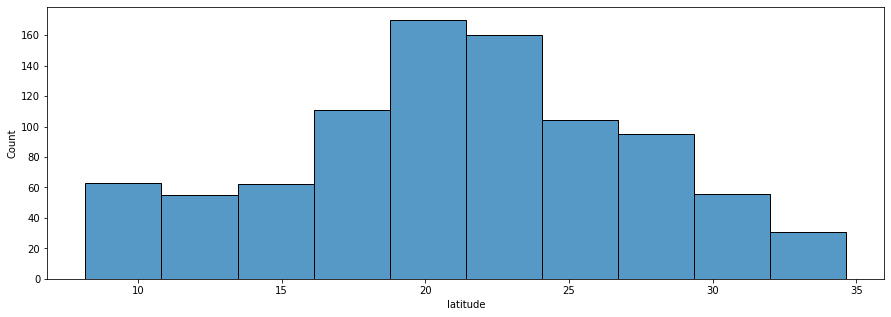

In [98]:
#Histplot for "latitude" column
print(df["latitude"].value_counts())
plt.figure(figsize=(15,5))
sns.histplot(x='latitude',data=df,bins=10)

In [99]:
#  Latitude in between 19-21 is highest.

77.464907    46
71.691700     4
75.898800     3
71.691800     3
72.898300     3
             ..
70.396100     1
74.239300     1
77.043500     1
73.825400     1
77.476800     1
Name: longitude, Length: 828, dtype: int64


<AxesSubplot:xlabel='longitude', ylabel='Count'>

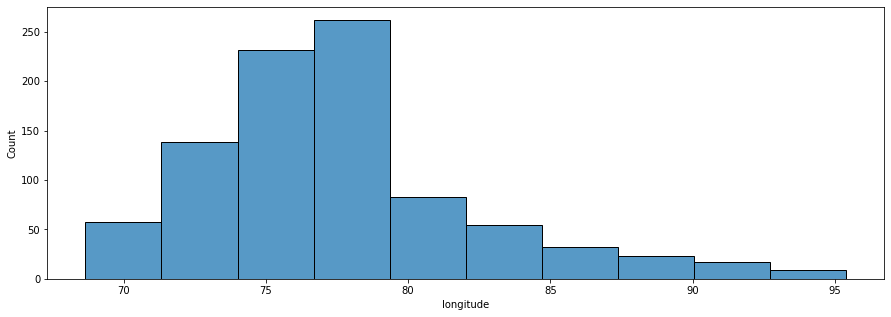

In [100]:
#Histplot for "longitude" column
print(df["longitude"].value_counts())
plt.figure(figsize=(15,5))
sns.histplot(x='longitude',data=df,bins=10)

In [101]:
#  longitude between 77 to 79 is highest.

1997.091082    380
2015.000000     28
2013.000000     25
2012.000000     23
2016.000000     19
              ... 
1946.000000      1
1956.000000      1
1937.000000      1
1949.000000      1
1953.000000      1
Name: commissioning_year, Length: 74, dtype: int64


<AxesSubplot:xlabel='commissioning_year', ylabel='Count'>

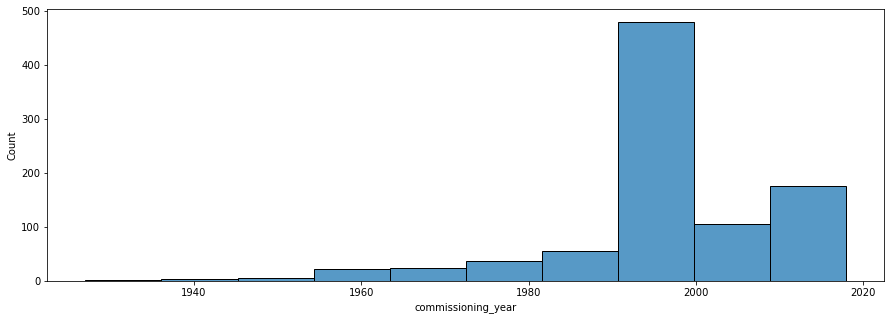

In [102]:
#Histplot for "commissioning_year" column
print(df["commissioning_year"].value_counts())
plt.figure(figsize=(15,5))
sns.histplot(x='commissioning_year',data=df,bins=10)

commissioning_year 1997 is highest.

2431.82359    509
0.00000        28
359.13980       1
7368.39000      1
9983.01800      1
             ... 
1154.34200      1
451.05340       1
3239.14290      1
3155.00000      1
3194.35982      1
Name: generation_gwh_2014, Length: 372, dtype: int64


<AxesSubplot:xlabel='generation_gwh_2014', ylabel='Count'>

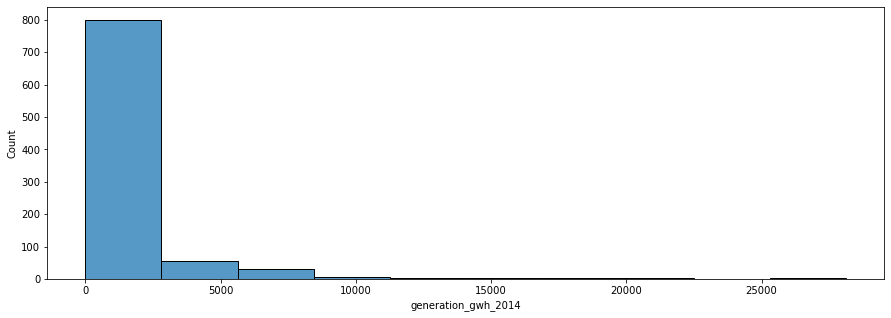

In [103]:
#Histplot for "generation_gwh_2014" column
print(df["generation_gwh_2014"].value_counts())
plt.figure(figsize=(15,5))
sns.histplot(x='generation_gwh_2014',data=df,bins=10)

In [104]:
#   generation_gwh_2014 between 0 to 2500 is highest.

2428.226946     485
0.000000         27
1497.798000       1
10422.690000      1
240.799900        1
               ... 
14192.000000      1
219.377600        1
288.460450        1
410.566850        1
0.994875          1
Name: generation_gwh_2015, Length: 397, dtype: int64


<AxesSubplot:xlabel='generation_gwh_2015', ylabel='Count'>

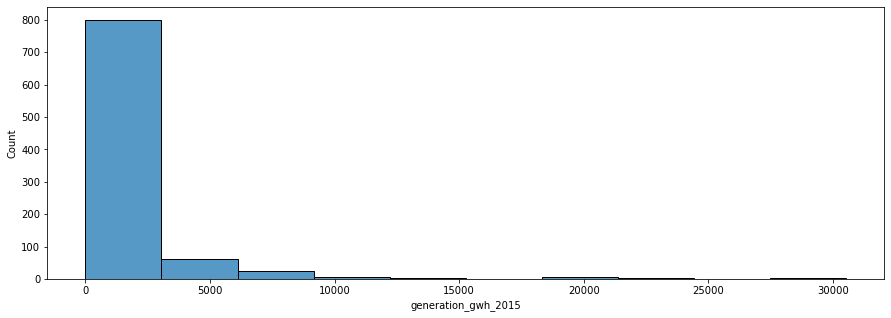

In [105]:
#Histplot for "generation_gwh_2015" column
print(df["generation_gwh_2015"].value_counts())
plt.figure(figsize=(15,5))
sns.histplot(x='generation_gwh_2015',data=df,bins=10)

In [106]:
#   generation_gwh_2015 between 0 to 2500 is highest.

2467.936859     473
0.000000         30
8470.570000       2
1511.000000       2
12.676300         1
               ... 
131.021600        1
6130.019928       1
5931.490000       1
14834.800000      1
233.596650        1
Name: generation_gwh_2016, Length: 404, dtype: int64


<AxesSubplot:xlabel='generation_gwh_2016', ylabel='Count'>

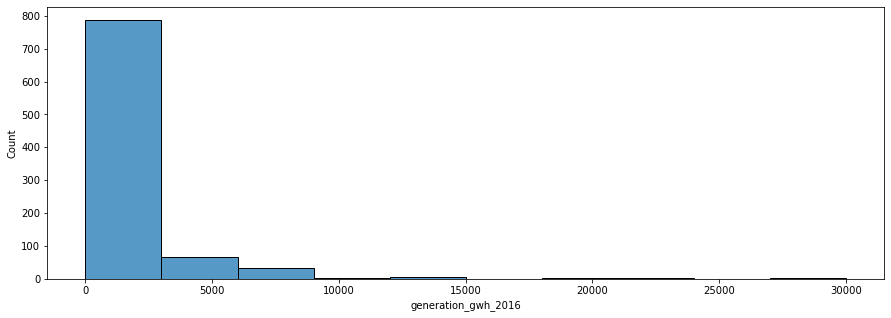

In [107]:
#Histplot for "generation_gwh_2016" column
print(df["generation_gwh_2016"].value_counts())
plt.figure(figsize=(15,5))
sns.histplot(x='generation_gwh_2016',data=df,bins=10)

generation_gwh_2016 between 0 to 2500 is highest.

2547.759305     467
0.000000         32
170.085300        2
272.739450        1
0.975100          1
               ... 
15177.000000      1
191.945450        1
307.375400        1
382.438200        1
865.400000        1
Name: generation_gwh_2017, Length: 409, dtype: int64


<AxesSubplot:xlabel='generation_gwh_2017', ylabel='Count'>

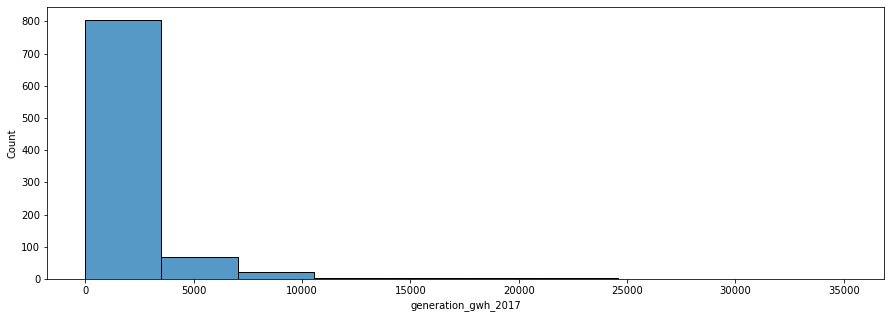

In [108]:
#Histplot for "generation_gwh_2017" column
print(df["generation_gwh_2017"].value_counts())
plt.figure(figsize=(15,5))
sns.histplot(x='generation_gwh_2017',data=df,bins=10)

In [109]:
#  generation_gwh_2017 between 0 to 2700 is highest.

2600.804099     459
0.000000         39
21.939750         1
17.213500         1
7200.400000       1
               ... 
7321.267900       1
6532.350000       1
15305.220000      1
373.970750        1
686.500000        1
Name: generation_gwh_2018, Length: 411, dtype: int64


<AxesSubplot:xlabel='generation_gwh_2018', ylabel='Count'>

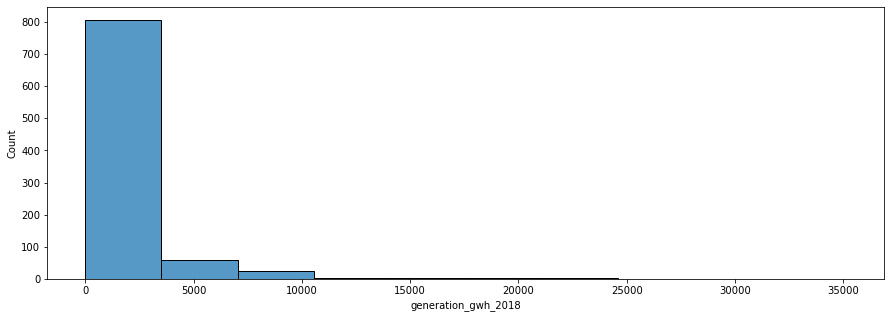

In [110]:
#Histplot for "generation_gwh_2018" column
print(df["generation_gwh_2018"].value_counts())
plt.figure(figsize=(15,5))
sns.histplot(x='generation_gwh_2018',data=df,bins=10)

<AxesSubplot:xlabel='geolocation_source', ylabel='count'>

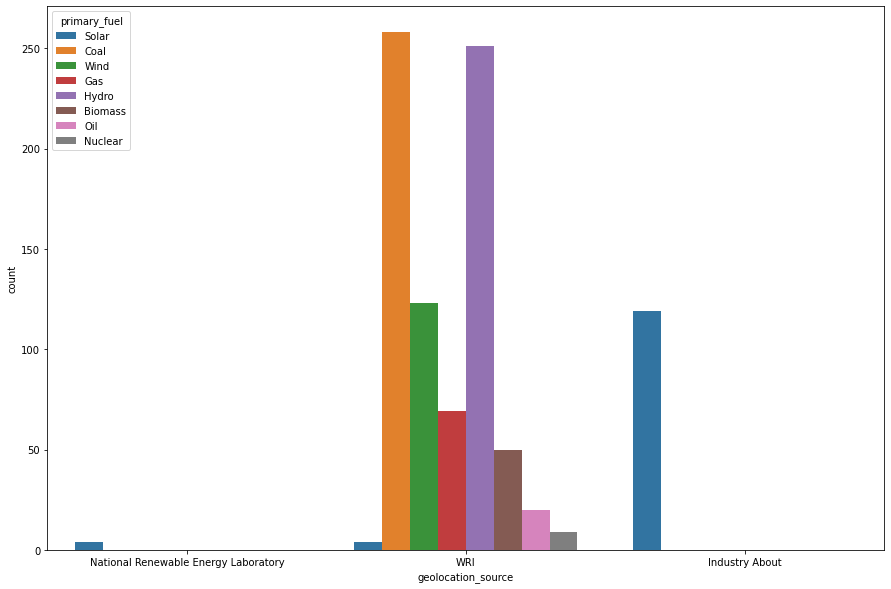

In [112]:
#  Bivariate Analysis
# Count Plot for comparision between "geolocation_source" column and "primary_fuel" column
plt.figure(figsize=(15,10))
sns.countplot("geolocation_source",data=df, hue='primary_fuel')

In [113]:
#  We can see 'WRI' geolocation_source uses coal most then Hydro and solar least.

<AxesSubplot:xlabel='geolocation_source', ylabel='capacity_mw'>

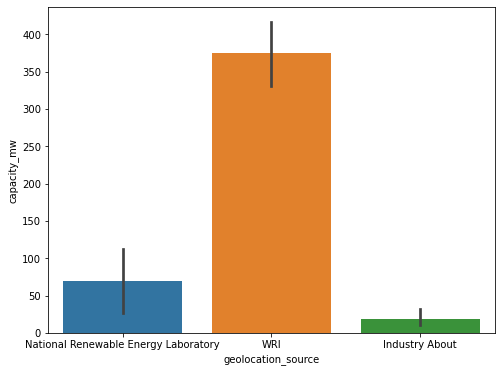

In [120]:
#Count Plot for comparision between "geolocation_source" column and "capacity_mw" column
plt.figure(figsize=(8,6))
sns.barplot(x="geolocation_source",data=df, y='capacity_mw')

In [121]:
#  We can see 'WRI' geolocation_source uses coal most then Hydro and solar least.

<AxesSubplot:xlabel='primary_fuel', ylabel='latitude'>

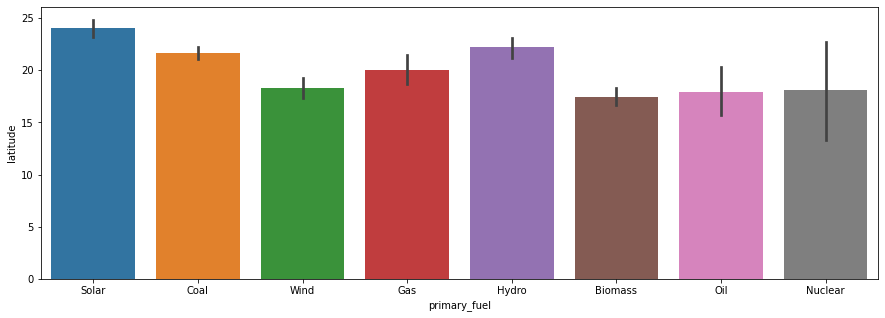

In [122]:
#hist Plot for comparision between "latitude" column and "primary_fuel" column
plt.figure(figsize=(15,5))
sns.barplot(y="latitude",data=df,x='primary_fuel')

In [123]:
#  We can see Solar is used most.

<AxesSubplot:xlabel='primary_fuel', ylabel='longitude'>

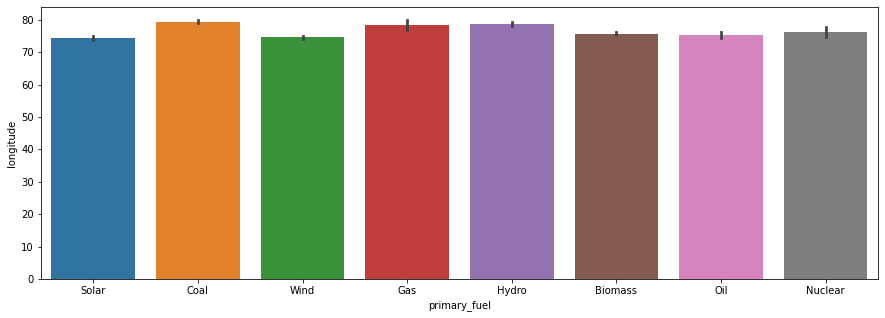

In [124]:
#hist Plot for comparision between "longitude" column and "primary_fuel" column
plt.figure(figsize=(15,5))
sns.barplot(y="longitude",data=df,x='primary_fuel')

We can see Coal is used most.

<AxesSubplot:xlabel='primary_fuel', ylabel='longitude'>

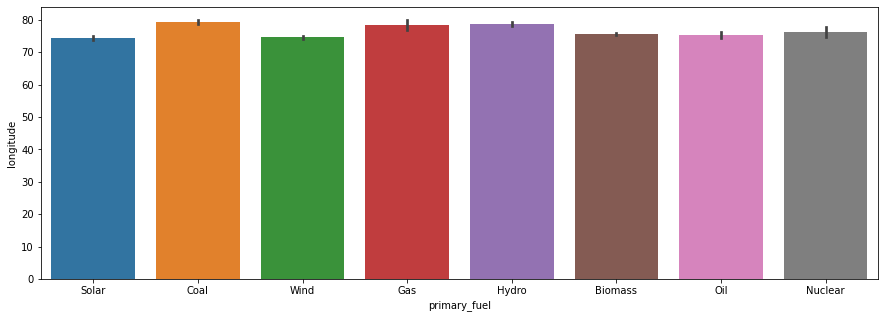

In [125]:
#Bar Plot for comparision between "longitude" column and "primary_fuel" column
plt.figure(figsize=(15,5))
sns.barplot(y="longitude",data=df,x='primary_fuel')

In [126]:
#  We can see Coal is used most.

<AxesSubplot:xlabel='primary_fuel', ylabel='commissioning_year'>

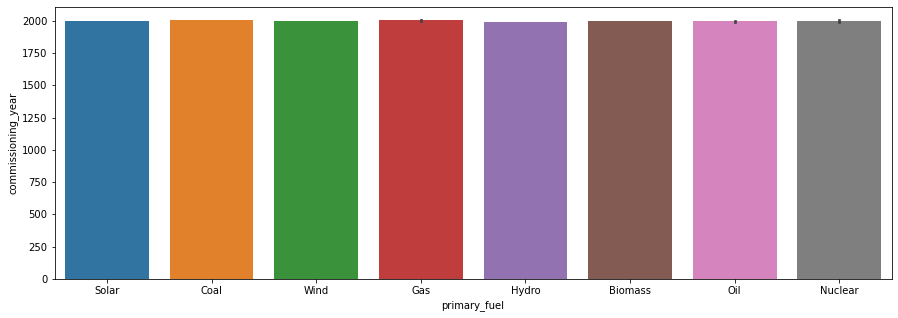

In [127]:
#Bar Plot for comparision between "commissioning_year" column and "primary_fuel" column
plt.figure(figsize=(15,5))
sns.barplot(y="commissioning_year",data=df,x='primary_fuel')

In [129]:
#   All primary_fuel used equally.

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2014'>

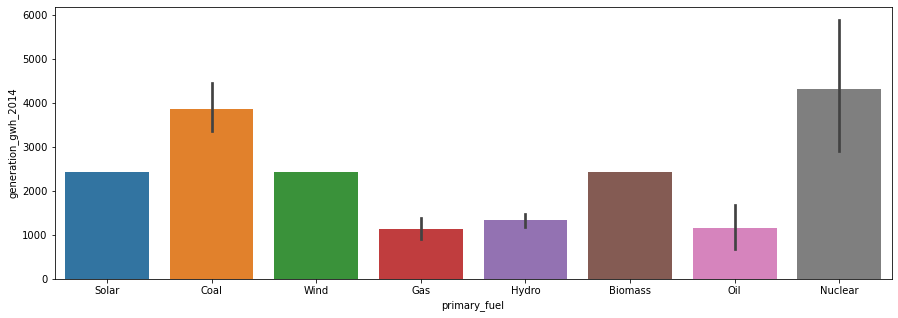

In [130]:
#Bar Plot for comparision between "generation_gwh_2014" column and "primary_fuel" column
plt.figure(figsize=(15,5))
sns.barplot(y="generation_gwh_2014",data=df,x='primary_fuel')

In [131]:
#  We can see Nuclear is used most.

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2015'>

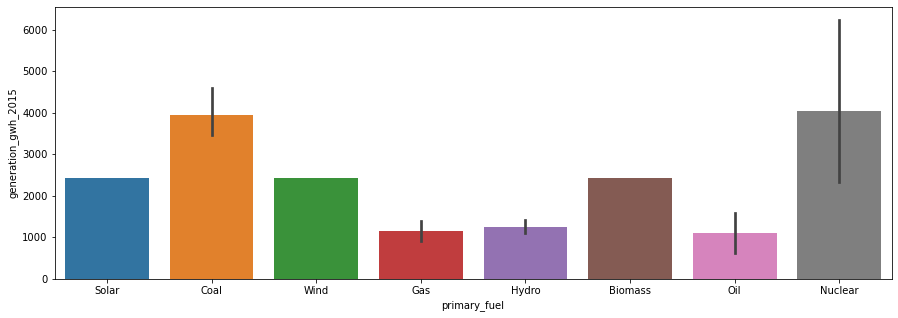

In [132]:
#Bar Plot for comparision between "generation_gwh_2015" column and "primary_fuel" column
plt.figure(figsize=(15,5))
sns.barplot(y="generation_gwh_2015",data=df,x='primary_fuel')

In [133]:
#  We can see Nuclear is used most.

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2016'>

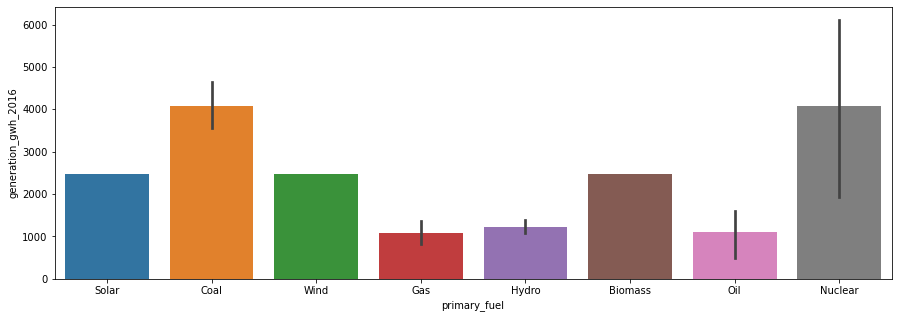

In [134]:
#Bar Plot for comparision between "generation_gwh_2016" column and "primary_fuel" column
plt.figure(figsize=(15,5))
sns.barplot(y="generation_gwh_2016",data=df,x='primary_fuel')

In [135]:
#  We can see Nuclear is used most.

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2017'>

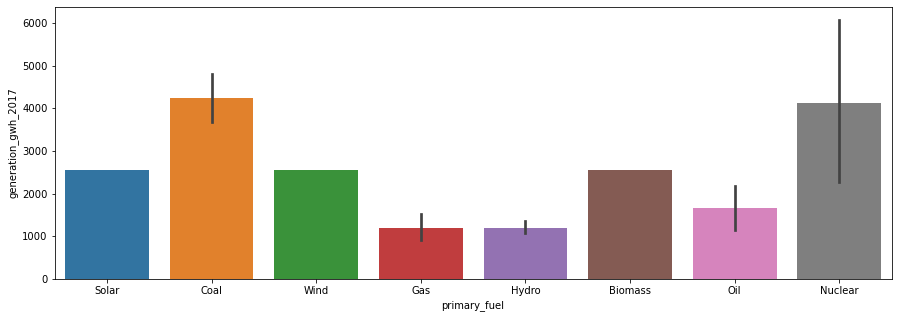

In [136]:
#Bar Plot for comparision between "generation_gwh_2017" column and "primary_fuel" column
plt.figure(figsize=(15,5))
sns.barplot(y="generation_gwh_2017",data=df,x='primary_fuel')

In [137]:
#  We can see Coal is used most.

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2018'>

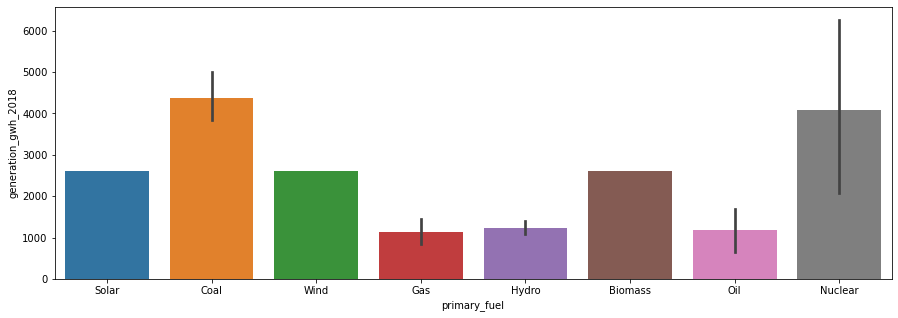

In [138]:
#Bar Plot for comparision between "generation_gwh_2018" column and "primary_fuel" column
plt.figure(figsize=(15,5))
sns.barplot(y="generation_gwh_2018",data=df,x='primary_fuel')

In [139]:
#  We can see Coal is used most.

<AxesSubplot:xlabel='geolocation_source', ylabel='capacity_mw'>

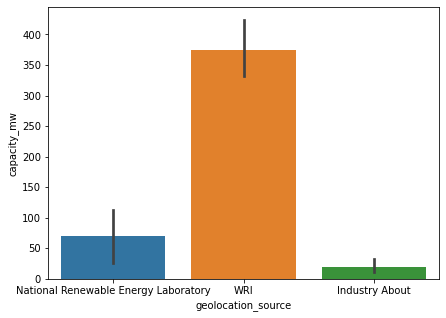

In [140]:
#Bar Plot for comparision between "geolocation_source" column and "capacity_mw" column
plt.figure(figsize=(7,5))
sns.barplot(x="geolocation_source",data=df, y='capacity_mw')

In [141]:
#  We can see WRI is used most.

<AxesSubplot:xlabel='latitude', ylabel='capacity_mw'>

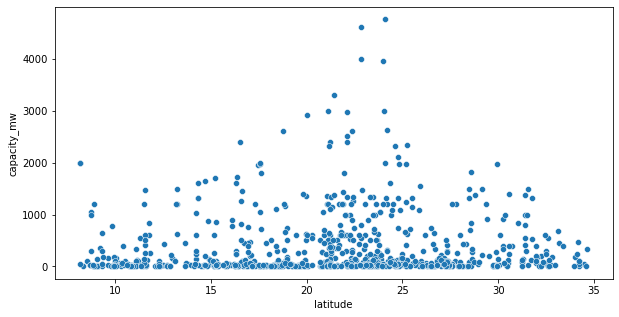

In [142]:
#scatterplot for comparision between "latitude" column and "capacity_mw" column
plt.figure(figsize=(10,5))
sns.scatterplot(x="latitude",data=df, y='capacity_mw')

In [143]:
#  We can see it is there is correlation between "latitude" column and "capacity_mw" column.

<AxesSubplot:xlabel='longitude', ylabel='capacity_mw'>

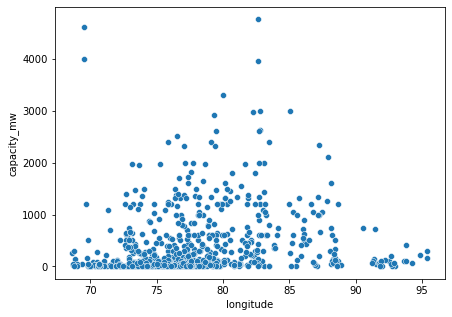

In [144]:
#scatterplot for comparision between "longitude" column and "capacity_mw" column
plt.figure(figsize=(7,5))
sns.scatterplot(x="longitude",data=df, y='capacity_mw')

In [145]:
#  We can see it is there is correlation between "longitude" column and "capacity_mw" column.

<AxesSubplot:xlabel='generation_gwh_2014', ylabel='capacity_mw'>

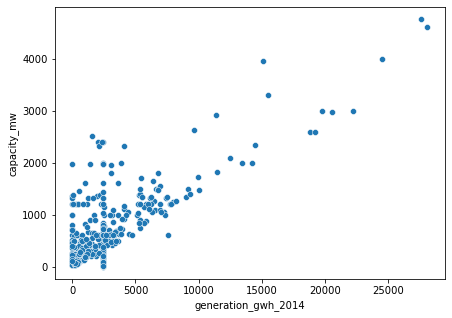

In [146]:
#scatterplot for comparision between "generation_gwh_2014" column and "capacity_mw" column
plt.figure(figsize=(7,5))
sns.scatterplot(x="generation_gwh_2014",data=df, y='capacity_mw')

In [147]:
#  We can see it is High Positive correlation between "generation_gwh_2014" column and "capacity_mw" column.

<AxesSubplot:xlabel='generation_gwh_2015', ylabel='capacity_mw'>

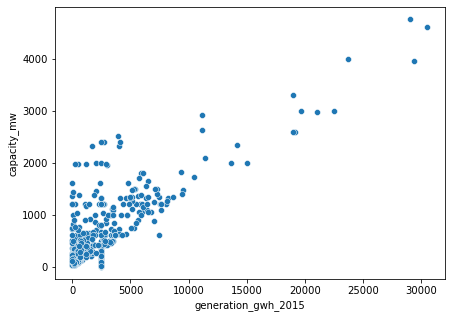

In [148]:
#scatterplot for comparision between "generation_gwh_2015" column and "capacity_mw" column
plt.figure(figsize=(7,5))
sns.scatterplot(x="generation_gwh_2015",data=df, y='capacity_mw')

In [149]:
#  We can see it is High Positive correlation between "generation_gwh_2015" column and "capacity_mw" column.

<AxesSubplot:xlabel='generation_gwh_2016', ylabel='capacity_mw'>

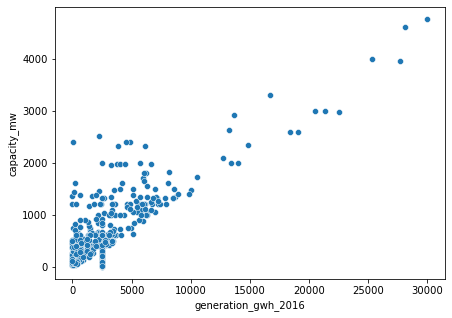

In [150]:
#scatterplot for comparision between "generation_gwh_2016" column and "capacity_mw" column
plt.figure(figsize=(7,5))
sns.scatterplot(x="generation_gwh_2016",data=df, y='capacity_mw')

We can see it is High Positive correlation between "generation_gwh_2016" column and "capacity_mw" column.

<AxesSubplot:xlabel='generation_gwh_2017', ylabel='capacity_mw'>

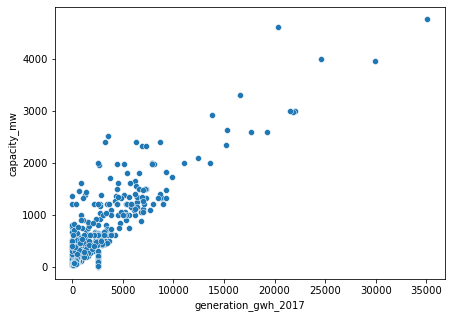

In [151]:
#scatterplot for comparision between "generation_gwh_2017" column and "capacity_mw" column
plt.figure(figsize=(7,5))
sns.scatterplot(x="generation_gwh_2017",data=df, y='capacity_mw')

In [152]:
#  We can see it is High Positive correlation between "generation_gwh_2017" column and "capacity_mw" column.

<AxesSubplot:xlabel='generation_gwh_2018', ylabel='capacity_mw'>

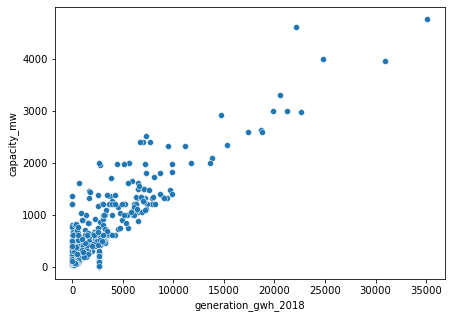

In [153]:
#scatterplot for comparision between "generation_gwh_2018" column and "capacity_mw" column
plt.figure(figsize=(7,5))
sns.scatterplot(x="generation_gwh_2018",data=df, y='capacity_mw')

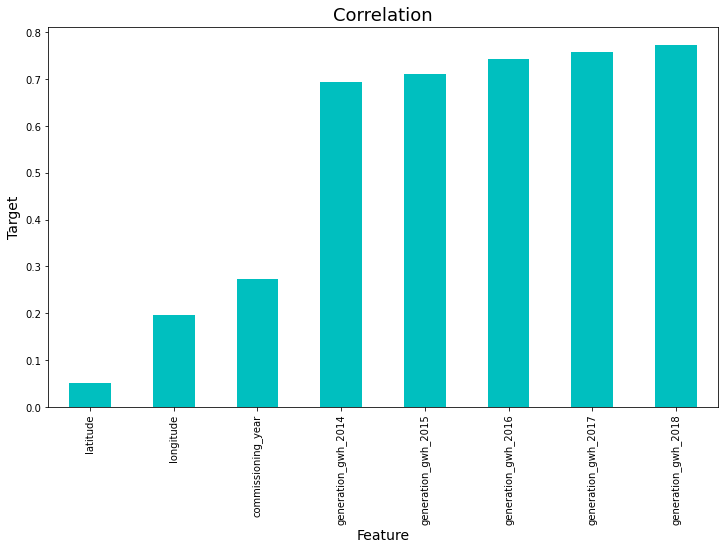

In [154]:
#  We can see it is High Positive correlation between "generation_gwh_2018" column and "capacity_mw" column.

#  Multivariate Analysis
#  Using barplot
plt.figure(figsize=(12,7))
df.corr()['capacity_mw'].sort_values(ascending=True).drop(['capacity_mw']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Target',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

In [155]:
#  We can see All Columns are positively correlated with target column "capacity_mw"

In [156]:
df.corr()

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
capacity_mw,1.000000,0.050984,0.195882,0.274292,0.694350,0.711190,0.742221,0.757585,0.773456
latitude,0.050984,1.000000,0.036362,0.102069,0.044321,0.036398,0.031256,0.031212,0.031326
longitude,0.195882,0.036362,1.000000,0.092331,0.011472,0.018818,0.039209,0.039675,0.037780
commissioning_year,0.274292,0.102069,0.092331,1.000000,0.133051,0.147338,0.170644,0.170863,0.174377
generation_gwh_2014,0.694350,0.044321,0.011472,0.133051,1.000000,0.953594,0.925874,0.891687,0.884956
generation_gwh_2015,0.711190,0.036398,0.018818,0.147338,0.953594,1.000000,0.968888,0.928242,0.923461
generation_gwh_2016,0.742221,0.031256,0.039209,0.170644,0.925874,0.968888,1.000000,0.964649,0.957159
generation_gwh_2017,0.757585,0.031212,0.039675,0.170863,0.891687,0.928242,0.964649,1.000000,0.982689
generation_gwh_2018,0.773456,0.031326,0.037780,0.174377,0.884956,0.923461,0.957159,0.982689,1.000000


In [157]:
#  This gives the correlation between the denpendent and independent variables.

df.corr()["capacity_mw"].sort_values()

latitude               0.050984
longitude              0.195882
commissioning_year     0.274292
generation_gwh_2014    0.694350
generation_gwh_2015    0.711190
generation_gwh_2016    0.742221
generation_gwh_2017    0.757585
generation_gwh_2018    0.773456
capacity_mw            1.000000
Name: capacity_mw, dtype: float64

Observation:
We can observe least correlation is with column "latitude" and strong correlation is with column "generation_gwh_2018".
All columns are positively correlated with target column "capacity_mw".

<AxesSubplot:>

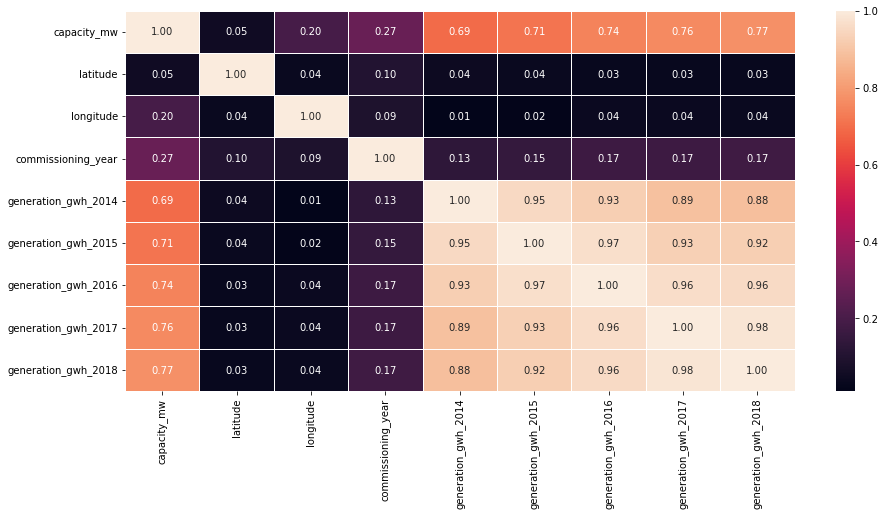

In [158]:
#  checking correlation with heatmap
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True, linewidth=0.5, linecolor='white', fmt='.2f')

Outcome of Correlation with Target Column "capacity_mw" :
'latitude' has 5 percent correlation with the target column which can be considered as weak correlation and positively correlated.
'longitude' has 20 percent correlation with the target column which can be considered as good correlation and positively correlated.
'commissioning_year' has 27 percent correlation with the target column which can be considered as good correlation and positively correlated.
'generation_gwh_2014' has 69 percent correlation with the target column which can be considered as good correlation and positively correlated.
'generation_gwh_2015' has 71 percent correlation with the target column which can be considered as good correlation and positively correlated.
'generation_gwh_2016' has 74 percent correlation with the target column which can be considered as good correlation and positively correlated.
'generation_gwh_2017' has 76 percent correlation with the target column which can be considered as good correlation and positively correlated.
'generation_gwh_2018' has 77 percent correlation with the target column which can be considered as strong correlation and positively correlated.
Min Correlation: latitude

Max Correlation: generation_gwh_2018

In [159]:
#  Label Encoding
from sklearn.preprocessing import LabelEncoder

In [160]:
enc = LabelEncoder()
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [161]:
df.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel',
       'commissioning_year', 'geolocation_source', 'generation_gwh_2014',
       'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017',
       'generation_gwh_2018'],
      dtype='object')

In [162]:
df.dtypes

capacity_mw            float64
latitude               float64
longitude              float64
primary_fuel             int32
commissioning_year     float64
geolocation_source       int32
generation_gwh_2014    float64
generation_gwh_2015    float64
generation_gwh_2016    float64
generation_gwh_2017    float64
generation_gwh_2018    float64
dtype: object

In [163]:
#  Checking both target column unique value after transformation
df["primary_fuel"].unique()

array([6, 1, 7, 2, 3, 0, 5, 4])

In [164]:
df["capacity_mw"].nunique()

361

In [165]:
#  Checking dataset after transformation
df.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,6,2011.000000,1,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
1,98.0,24.7663,74.6090,1,1997.091082,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
2,39.2,21.9038,69.3732,7,1997.091082,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
3,135.0,23.8712,91.3602,2,2004.000000,2,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,1,2015.000000,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000


In [166]:
df.shape

(907, 11)

In [167]:
df.corr()["primary_fuel"].sort_values()

geolocation_source    -0.483217
capacity_mw           -0.380395
longitude             -0.347948
generation_gwh_2018   -0.136983
generation_gwh_2017   -0.132003
generation_gwh_2016   -0.131051
commissioning_year    -0.126650
generation_gwh_2015   -0.124828
generation_gwh_2014   -0.124769
latitude              -0.010204
primary_fuel           1.000000
Name: primary_fuel, dtype: float64

Observation:
- All columns are negatively correlated with Target Column "primary_fuel"
- We can observe least correlation is with column "geolocation_source" and strong correlation is with column "latitude". 

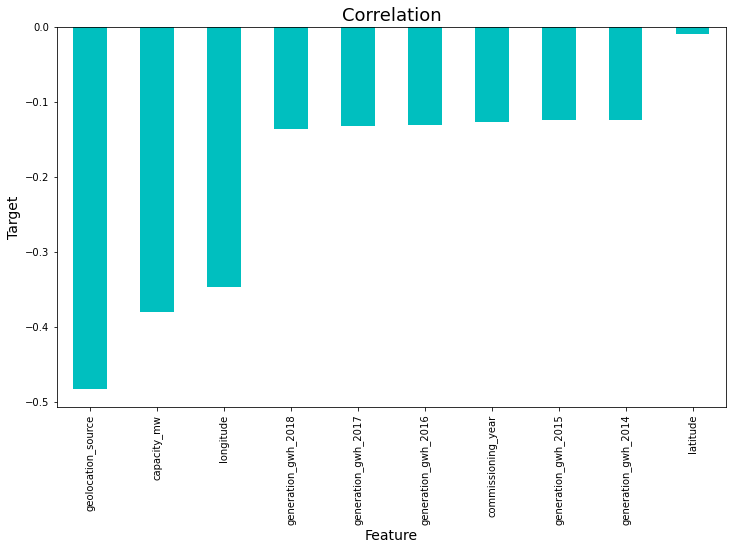

In [168]:
plt.figure(figsize=(12,7))
df.corr()['primary_fuel'].sort_values(ascending=True).drop(['primary_fuel']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Target',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

In [169]:
#  All columns are negatively correlated with Target Column "primary_fuel"

<AxesSubplot:>

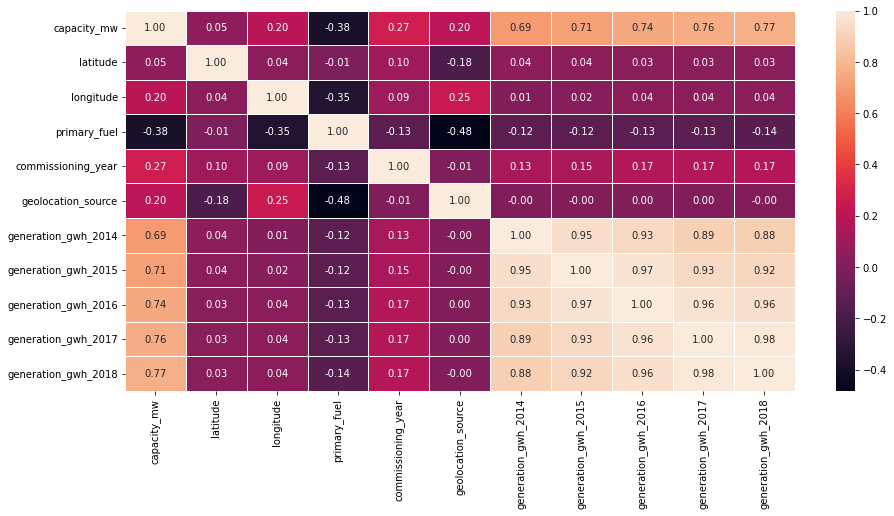

In [170]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True, linewidth=0.5, linecolor='white', fmt='.2f')

Outcome of Correlation with Target Column "primary_fuel" :
'capacity_mw' has -38 percent correlation with the target column which can be considered as good correlation and negatively correlated.
'latitude' has -1 percent correlation with the target column which can be considered as strong correlation and negatively correlated.
'longitude' has -35 percent correlation with the target column which can be considered as good correlation and negatively correlated.
'commissioning_year' has -13 percent correlation with the target column which can be considered as good correlation and negatively correlated.
'geolocation_source' has -48 percent correlation with the target column which can be considered as weak correlation and negatively correlated.
'generation_gwh_2014' has -12 percent correlation with the target column which can be considered as good correlation and negatively correlated.
'generation_gwh_2015' has -12 percent correlation with the target column which can be considered as good correlation and negatively correlated.
'generation_gwh_2016' has -13 percent correlation with the target column which can be considered as good correlation and negatively correlated.
'generation_gwh_2017' has -13 percent correlation with the target column which can be considered as good correlation and negatively correlated.
'generation_gwh_2018' has -14 percent correlation with the target column which can be considered as good correlation and negatively correlated.
Min Correlation: geolocation_source

Max Correlation: latitude

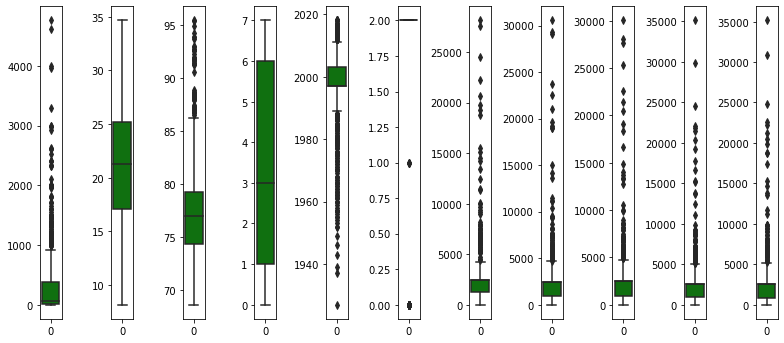

In [171]:
#  Checking Outliers
collist=df.columns.values
ncol=11
nrows=7
plt.figure(figsize=(ncol,3*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(data=df[collist[i]],color='green',orient='v')
    plt.tight_layout()

In [172]:
df.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel',
       'commissioning_year', 'geolocation_source', 'generation_gwh_2014',
       'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017',
       'generation_gwh_2018'],
      dtype='object')

Observation:
Outliers are present in columns: 'capacity_mw', 'longitude', 'commissioning_year', 'geolocation_source', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017' and 'generation_gwh_2018'.
Outliers are not present in columns: 'latitude' and 'primary_fuel'
But we will not remove Outliers from 'geolocation_source' column as it is categorical column.
Here we have to check two predictions : 'primary_fuel' and 'capacity_mw'. So we will remove outliers from 'capacity_mw' column when 'primary_fuel' is Target column and we will not remove outliers from it when 'capacity_mw' is Target column.

In [173]:
#Removing Outliers
#  1. Zscore method using Scipy for Target Column "primary_fuel"
#  Outliers will be removed only from Continuous column variable: 'capacity_mw', 'longitude', 'commissioning_year', 'geolocation_source', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018'primary_fuel. 
# We will not remove outliers from Categorical column i.e; 'primary_fuel' & 'geolocation_source'.
variable = df[[ 'capacity_mw', 'longitude', 'commissioning_year', 'geolocation_source', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018']]
z=np.abs(zscore(variable))
# Creating new dataframe for regression
df1 = df[(z<3).all(axis=1)]
df1.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,6,2011.000000,1,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
1,98.0,24.7663,74.6090,1,1997.091082,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
2,39.2,21.9038,69.3732,7,1997.091082,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
3,135.0,23.8712,91.3602,2,2004.000000,2,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,1,2015.000000,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000


In [174]:
z.head()

,capacity_mw,longitude,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,0.548908,0.878280,1.069162e+00,1.083349,1.707094e-16,0.000000,0.000000,1.557412e-16,1.501244e-16
1,0.386977,0.593788,1.747794e-14,0.394241,1.707094e-16,0.000000,0.000000,1.557412e-16,1.501244e-16
2,0.486679,1.682394,1.747794e-14,0.394241,1.707094e-16,0.000000,0.000000,1.557412e-16,1.501244e-16
3,0.324240,2.889052,5.310801e-01,0.394241,6.809773e-01,0.554446,0.549988,6.452243e-01,6.518573e-01
4,2.498942,1.027976,1.376637e+00,0.394241,2.266352e-01,1.220581,1.312471,9.718925e-01,1.544399e+00


In [175]:
print("Old DataFrame data in Rows and Column:",df.shape)
print("New DataFrame data in Rows and Column:",df1.shape)
print("Total Dropped rows:",df.shape[0]-df1.shape[0])

Old DataFrame data in Rows and Column: (907, 11)
New DataFrame data in Rows and Column: (849, 11)
Total Dropped rows: 58


In [176]:
# Percentage Data Loss using Zscore
loss_percent=(907-849)/907*100
print(loss_percent,"%")

6.39470782800441 %


1.1 Zscore method using Scipy for Target Column "capacity_mw"

In [177]:
#  Outliers will be removed only from Continuous column variable: 'longitude', 'commissioning_year', 'geolocation_source', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018'primary_fuel. 
# We will not remove outliers from Categorical column i.e; 'primary_fuel' & 'geolocation_source'.
# We will not remove outliers from Target column i.e; 'capacity_mw'

variable1 = df[[  'longitude', 'commissioning_year', 'geolocation_source', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018']]

z1=np.abs(zscore(variable1))

# Creating new dataframe for classification
df1 = df[(z1<3).all(axis=1)]
df1.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,6,2011.000000,1,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
1,98.0,24.7663,74.6090,1,1997.091082,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
2,39.2,21.9038,69.3732,7,1997.091082,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
3,135.0,23.8712,91.3602,2,2004.000000,2,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,1,2015.000000,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000


In [178]:
z1.head()

,longitude,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,0.878280,1.069162e+00,1.083349,1.707094e-16,0.000000,0.000000,1.557412e-16,1.501244e-16
1,0.593788,1.747794e-14,0.394241,1.707094e-16,0.000000,0.000000,1.557412e-16,1.501244e-16
2,1.682394,1.747794e-14,0.394241,1.707094e-16,0.000000,0.000000,1.557412e-16,1.501244e-16
3,2.889052,5.310801e-01,0.394241,6.809773e-01,0.554446,0.549988,6.452243e-01,6.518573e-01
4,1.027976,1.376637e+00,0.394241,2.266352e-01,1.220581,1.312471,9.718925e-01,1.544399e+00


In [179]:
print("Old DataFrame data in Rows and Column:",df.shape)
print("New DataFrame data in Rows and Column:",df1.shape)
print("Total Dropped rows:",df.shape[0]-df1.shape[0])

Old DataFrame data in Rows and Column: (907, 11)
New DataFrame data in Rows and Column: (855, 11)
Total Dropped rows: 52


In [180]:
loss_percent1=(907-849)/907*100
print(loss_percent1,"%")

6.39470782800441 %


2. IQR (Inter Quantile Range) method for Target Column "primary_fuel"

In [181]:
#1st quantile
Q1=variable.quantile(0.25)

# 3rd quantile
Q3=variable.quantile(0.75)

#IQR
IQR=Q3 - Q1
df2=df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [182]:
print("Old DataFrame data in Rows and Column:",df.shape)
print("\nNew DataFrame data in Rows and Column:",df2.shape)
print("\nTotal Dropped rows:",df.shape[0]-df2.shape[0])

Old DataFrame data in Rows and Column: (907, 11)

New DataFrame data in Rows and Column: (438, 11)

Total Dropped rows: 469


In [183]:
#  Percentage Data Loss using IQR
loss_perc = (907-438)/907*100
loss_perc

51.70893054024256

2.1 IQR (Inter Quantile Range) method for Target Column "capacity_mw"

In [184]:
#1st quantile
Q1=variable.quantile(0.25)

# 3rd quantile
Q3=variable.quantile(0.75)

#IQR
IQR=Q3 - Q1
df2=df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [185]:
print("Old DataFrame data in Rows and Column:",df.shape)
print("\nNew DataFrame data in Rows and Column:",df2.shape)
print("\nTotal Dropped rows:",df.shape[0]-df2.shape[0])

Old DataFrame data in Rows and Column: (907, 11)

New DataFrame data in Rows and Column: (438, 11)

Total Dropped rows: 469


In [186]:
#  Percentage Data Loss using IQR
loss_perc1 = (907-438)/907*100
loss_perc1

51.70893054024256

In [187]:
#  We can check by using IQR method there is large data loss in comparision to Zscore method. So, we will consider Zscore method.

#   Checking for the skewness

In [188]:
#Target Column "primary_fuel"
df1.skew()

capacity_mw            2.163488
latitude              -0.110936
longitude              0.917381
primary_fuel           0.420074
commissioning_year    -0.836962
geolocation_source    -2.074380
generation_gwh_2014    1.525975
generation_gwh_2015    1.375828
generation_gwh_2016    1.389992
generation_gwh_2017    1.293269
generation_gwh_2018    1.421012
dtype: float64

Observation:
Skewness threshold taken is +/-0.5
All the columns are not normallly distributed
Columns which are having skewness: 'capacity_mw','longitude', 'latitude', 'commissioning_year', 'geolocation_source', 'generation_gwh_2014', 'generation_gwh_2015','generation_gwh_2016', 'generation_gwh_2017' and 'generation_gwh_2018'
The 'capacity_mw' column data is highly skewed
Also we will not remove skewness from 'geolocation_source' as it contains categorical data.

In [189]:
#  Checking skewness through data visualization

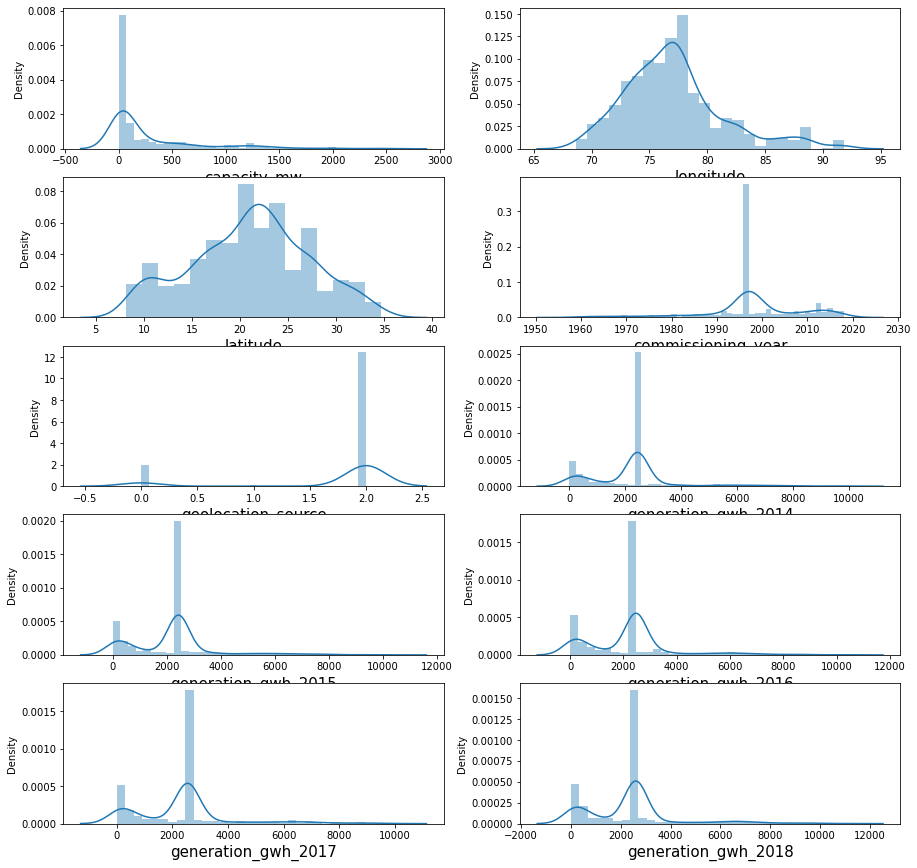

In [190]:
#Target Column is "primary_fuel"
collist=[ 'capacity_mw','longitude', 'latitude', 'commissioning_year', 'geolocation_source', 'generation_gwh_2014', 'generation_gwh_2015','generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018']

plt.figure(figsize=(15,15))
plotnumber = 1

for column in df1[collist]:
    if plotnumber<=10:
        ax = plt.subplot(5,2,plotnumber)
        sns.distplot(df1[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()

We can see skewness is present in all columns

In [191]:
#Target Column "capacity_mw"
df1.skew()

capacity_mw            2.163488
latitude              -0.110936
longitude              0.917381
primary_fuel           0.420074
commissioning_year    -0.836962
geolocation_source    -2.074380
generation_gwh_2014    1.525975
generation_gwh_2015    1.375828
generation_gwh_2016    1.389992
generation_gwh_2017    1.293269
generation_gwh_2018    1.421012
dtype: float64

Observation:
Skewness threshold taken is +/-0.5
All the columns are not normallly distributed
Columns which are having skewness: 'capacity_mw','longitude', 'latitude', 'commissioning_year', 'geolocation_source', 'generation_gwh_2014', 'generation_gwh_2015','generation_gwh_2016', 'generation_gwh_2017' and 'generation_gwh_2018'
The 'capacity_mw' column data is highly skewed but we will not remove skewness from it as it is a Target column.
Also we will not remove skewness from 'primary_fuel' and 'geolocation_source' as it contains categorical data.
Checking skewness through data visualization

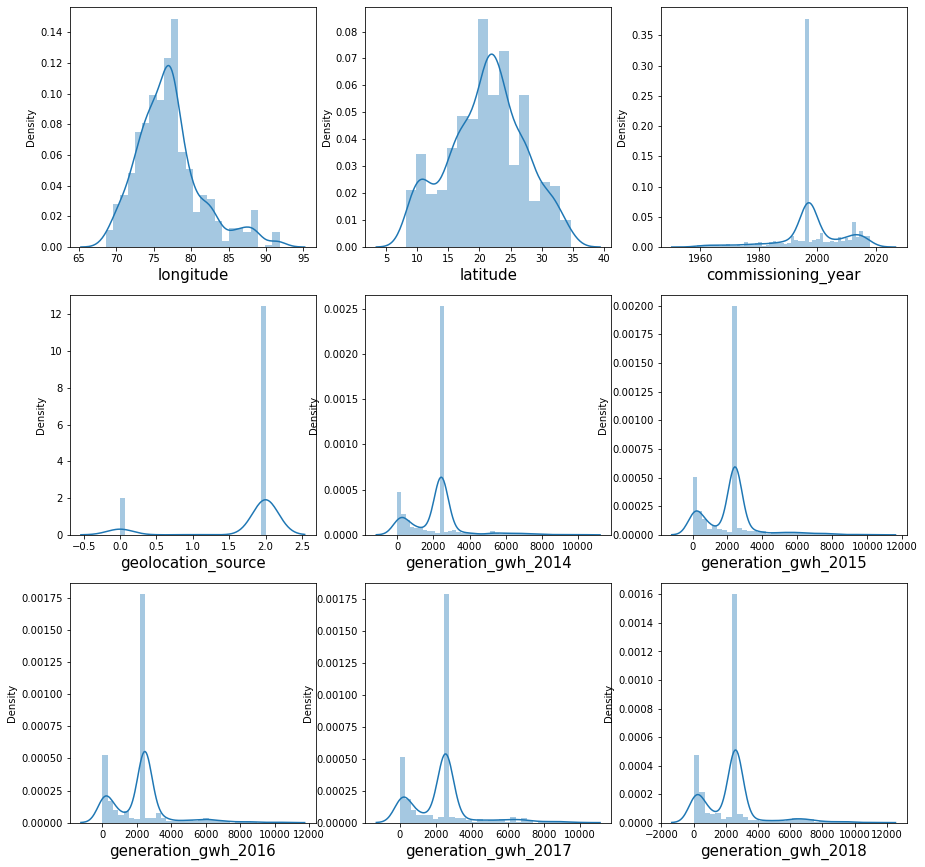

In [192]:
#Target Column is "capacity_mw"
collist=[ 'longitude', 'latitude', 'commissioning_year', 'geolocation_source', 'generation_gwh_2014', 'generation_gwh_2015','generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018']

plt.figure(figsize=(15,15))
plotnumber = 1

for column in df1[collist]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df1[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()

We can see skewness is present in all columns

Removing skewness using yeo-johnson method
Target Column is "primary_fuel"

In [193]:
collist=[ 'capacity_mw','longitude', 'latitude', 'commissioning_year', 'geolocation_source', 'generation_gwh_2014', 'generation_gwh_2015','generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018']

df1[collist]=power_transform(df1[collist],method='yeo-johnson')
df1[collist]

,capacity_mw,longitude,latitude,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,-1.677941,-0.932921,1.167827,1.271916,-2.249375,0.325398,0.350764,0.353547,0.346830,0.356994
1,0.214914,-0.513810,0.596640,-0.192081,0.407930,0.325398,0.350764,0.353547,0.346830,0.356994
2,-0.278156,-2.368066,0.122069,-0.192081,0.407930,0.325398,0.350764,0.353547,0.346830,0.356994
3,0.385690,2.447853,0.447846,0.486435,0.407930,-1.051490,-0.738620,-0.686010,-0.906651,-0.919602
4,1.720052,1.253377,0.131399,1.770248,0.407930,0.665459,1.898972,1.923558,1.534388,2.046635
...,...,...,...,...,...,...,...,...,...,...
902,1.661330,0.216288,-0.795932,1.900885,0.407930,0.325398,-2.098927,-1.419729,-0.723788,-0.861856
903,-1.598870,0.406355,-1.343416,-0.192081,-2.457754,0.325398,0.350764,0.353547,0.346830,0.356994
904,-0.510387,-0.239580,-0.960773,-0.192081,0.407930,0.325398,0.350764,0.353547,0.346830,0.356994
905,0.106203,-0.772877,0.527395,-0.192081,0.407930,0.325398,0.350764,0.353547,0.346830,0.356994


Checking skewness again after removal

In [194]:
df.skew()

capacity_mw            3.123576
latitude              -0.149698
longitude              1.141881
primary_fuel           0.472251
commissioning_year    -1.399359
geolocation_source    -2.159841
generation_gwh_2014    5.035446
generation_gwh_2015    5.364134
generation_gwh_2016    5.068427
generation_gwh_2017    5.110952
generation_gwh_2018    4.937907
dtype: float64

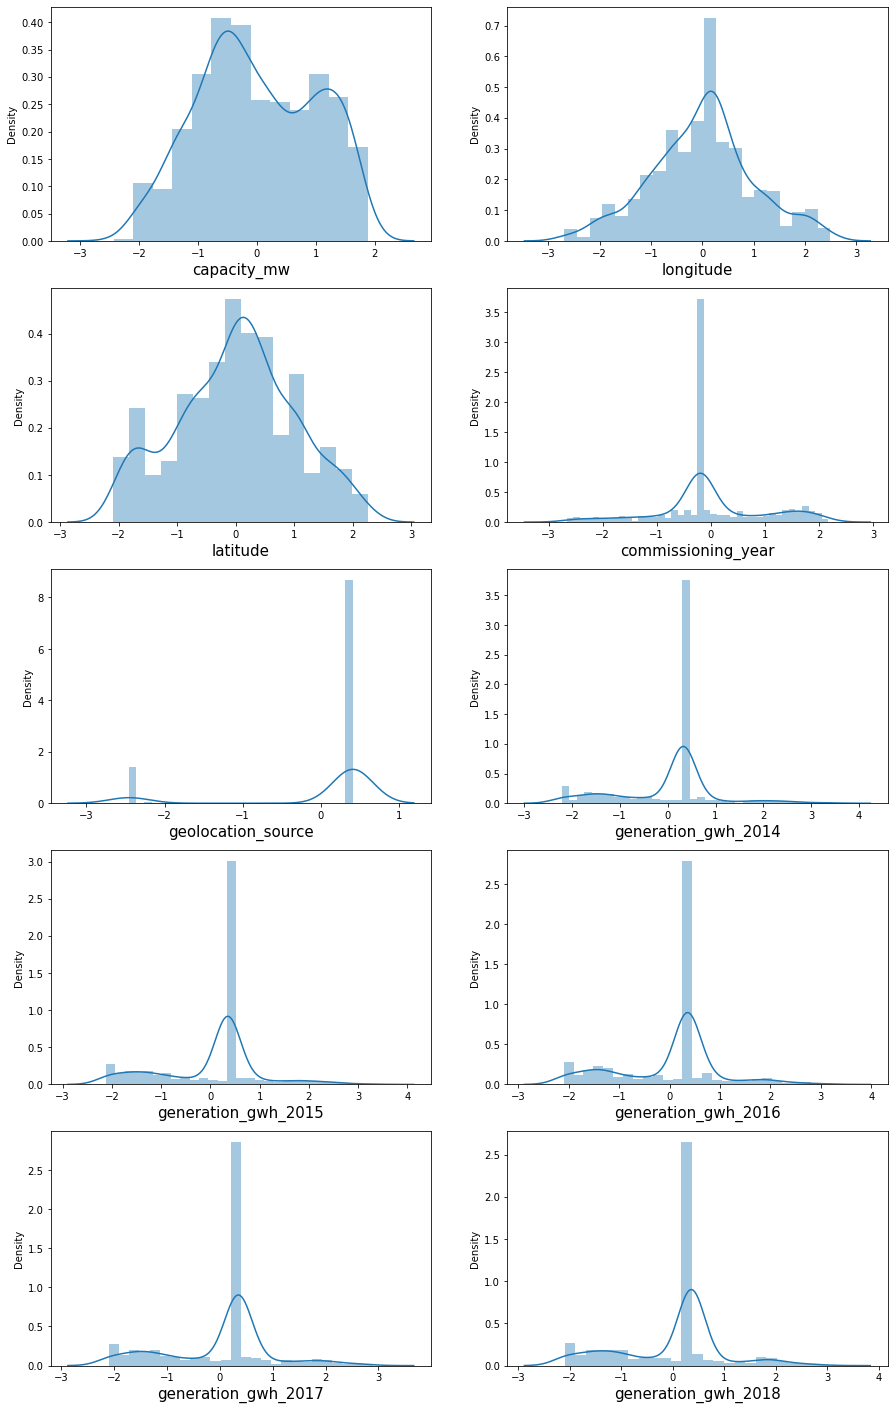

In [195]:
#Checking skewness through data visualization again after removal
#Target Column is "primary_fuel"
collist=[ 'capacity_mw','longitude', 'latitude', 'commissioning_year', 'geolocation_source', 'generation_gwh_2014', 'generation_gwh_2015','generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018']
plt.figure(figsize=(15,25))
plotnumber = 1
for column in df1[collist]:
    if plotnumber<=10:
        ax = plt.subplot(5,2,plotnumber)
        sns.distplot(df1[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()

In [196]:
#  Target Column is "capacity_mw"
collist=[ 'longitude', 'latitude', 'commissioning_year', 'geolocation_source', 'generation_gwh_2014', 'generation_gwh_2015','generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018']
df1[collist]=power_transform(df1[collist],method='yeo-johnson')
df1[collist]

,longitude,latitude,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,-0.932948,1.177697,1.255009,-2.449307,0.273351,0.286784,0.287998,0.278209,0.289559
1,-0.514772,0.585301,-0.169152,0.407970,0.273351,0.286784,0.287998,0.278209,0.289559
2,-2.362417,0.102221,-0.169152,0.407970,0.273351,0.286784,0.287998,0.278209,0.289559
3,2.453912,0.432816,0.503424,0.407970,-1.044218,-0.775013,-0.729647,-0.924247,-0.935275
4,1.254317,0.111620,1.721800,0.407970,0.641878,2.144288,2.182595,1.689873,2.356123
...,...,...,...,...,...,...,...,...,...
902,0.214945,-0.802164,1.843138,0.407970,0.273351,-1.893977,-1.353199,-0.765175,-0.885516
903,0.405222,-1.327672,-0.169152,-2.451225,0.273351,0.286784,0.287998,0.278209,0.289559
904,-0.240902,-0.961244,-0.169152,0.407970,0.273351,0.286784,0.287998,0.278209,0.289559
905,-0.773310,0.514231,-0.169152,0.407970,0.273351,0.286784,0.287998,0.278209,0.289559


In [197]:
#  Checking skewness again after removal
df1.skew()

capacity_mw            0.016759
latitude               0.014689
longitude              0.007539
primary_fuel           0.420074
commissioning_year    -0.131129
geolocation_source    -2.046785
generation_gwh_2014    0.296554
generation_gwh_2015    0.267133
generation_gwh_2016    0.249568
generation_gwh_2017    0.228451
generation_gwh_2018    0.225200
dtype: float64

In [198]:
#  Checking skewness through data visualization again after removal¶

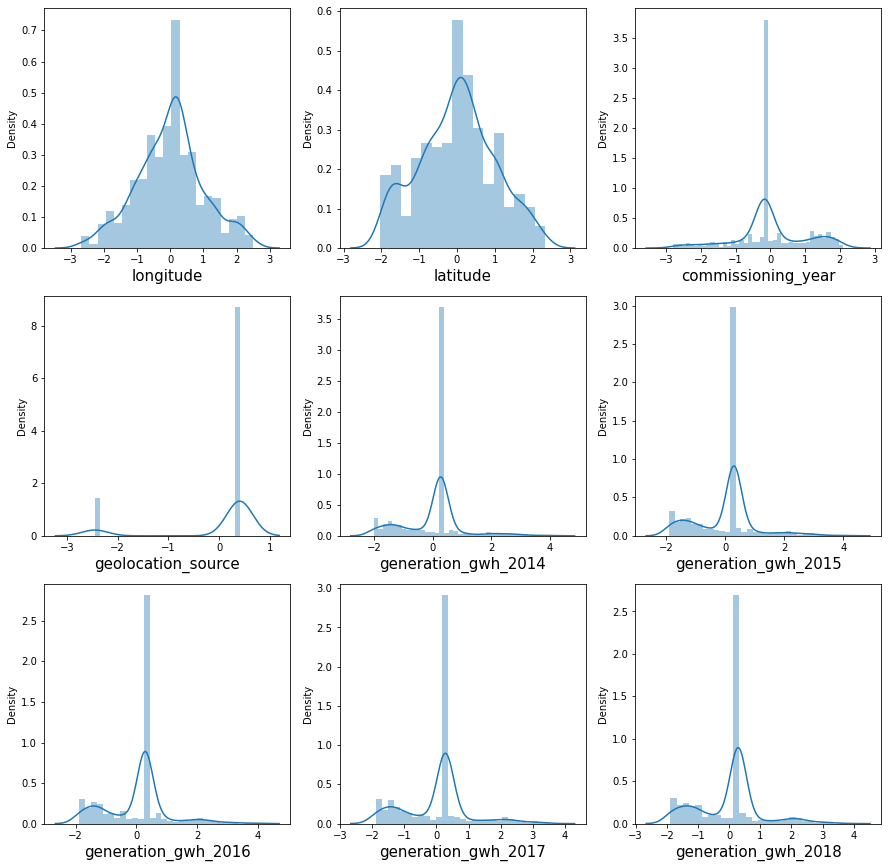

In [199]:
#Target Column is "capacity_mw"
collist=[ 'longitude', 'latitude', 'commissioning_year', 'geolocation_source', 'generation_gwh_2014', 'generation_gwh_2015','generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018']

plt.figure(figsize=(15,15))
plotnumber = 1

for column in df1[collist]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df1[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()

Now we can see that the data is almost normally distributed. But we can see that the feature variables are negatively skewed and it will inverse relationship between feature variables and target variables. So to remove this, we will use variance threshold method.

Data preprocessing

Spliting data into Target and Features:
Target Variable is primary_fuel

In [200]:
x=df1.drop("primary_fuel",axis=1)
y=df1["primary_fuel"]

In [201]:
y.head()

0    6
1    1
2    7
3    2
4    1
Name: primary_fuel, dtype: int32

In [202]:
x.shape, y.shape

((855, 10), (855,))

In [203]:
y.value_counts()

1    241
3    221
6    126
7    123
2     65
0     50
5     20
4      9
Name: primary_fuel, dtype: int64

In [204]:
#  The data is not balanced. So, we will use oversampling method to balance it.

In [205]:
#  Oversampling using the SMOTE

In [206]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

In [207]:
SM = SMOTE()
x, y = SM.fit_resample(x,y)

In [208]:
y.value_counts()

6    241
1    241
7    241
2    241
3    241
0    241
5    241
4    241
Name: primary_fuel, dtype: int64

In [209]:
#  After using oversampling method, we check that now our data is balanced.

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

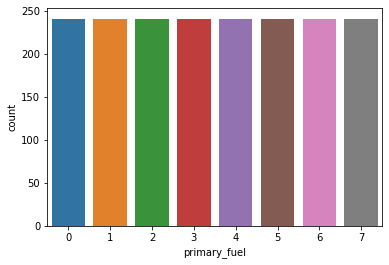

In [210]:
#checking through visualization also
sns.countplot(y)

In [211]:
#  Now, our data is balanced.

In [212]:
#  Scaling data using Standard Scaler

In [213]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)

In [214]:
x.head()

,capacity_mw,latitude,longitude,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,-1.770522,1.507007,-0.890574,1.665871,-2.706198,0.238731,0.262332,0.282168,0.248236,0.302251
1,0.195968,0.873118,-0.410964,-0.127048,0.369901,0.238731,0.262332,0.282168,0.248236,0.302251
2,-0.316283,0.356203,-2.530046,-0.127048,0.369901,0.238731,0.262332,0.282168,0.248236,0.302251
3,0.373388,0.709953,2.993849,0.719678,0.369901,-1.008283,-0.733039,-0.651784,-0.903335,-0.857548
4,1.759659,0.366260,1.618022,2.253528,0.369901,0.587524,2.003635,2.020949,1.600160,2.259085


In [215]:
#  Target Variable is capacity_mw

In [216]:
x1=df1.drop("capacity_mw",axis=1)
y1=df1["capacity_mw"]

In [217]:
x1.head()

,latitude,longitude,primary_fuel,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,1.177697,-0.932948,6,1.255009,-2.449307,0.273351,0.286784,0.287998,0.278209,0.289559
1,0.585301,-0.514772,1,-0.169152,0.407970,0.273351,0.286784,0.287998,0.278209,0.289559
2,0.102221,-2.362417,7,-0.169152,0.407970,0.273351,0.286784,0.287998,0.278209,0.289559
3,0.432816,2.453912,2,0.503424,0.407970,-1.044218,-0.775013,-0.729647,-0.924247,-0.935275
4,0.111620,1.254317,1,1.721800,0.407970,0.641878,2.144288,2.182595,1.689873,2.356123


In [218]:
y1.head()

0   -1.677941
1    0.214914
2   -0.278156
3    0.385690
4    1.720052
Name: capacity_mw, dtype: float64

In [219]:
y1.value_counts()

-1.360579    37
-1.009364    21
-0.795220    20
 1.164966    20
 1.517105    19
             ..
 0.322126     1
-0.593875     1
 0.580369     1
 1.202012     1
 0.259862     1
Name: capacity_mw, Length: 334, dtype: int64

In [221]:
#  Scaling data using Standard Scaler

In [222]:
scaler = StandardScaler()
x1 = pd.DataFrame(scaler.fit_transform(x1), columns = x1.columns)

In [223]:
x1.head()

,latitude,longitude,primary_fuel,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,1.177697,-0.932948,1.179853,1.255009,-2.449307,0.273351,0.286784,0.287998,0.278209,0.289559
1,0.585301,-0.514772,-0.972887,-0.169152,0.407970,0.273351,0.286784,0.287998,0.278209,0.289559
2,0.102221,-2.362417,1.610401,-0.169152,0.407970,0.273351,0.286784,0.287998,0.278209,0.289559
3,0.432816,2.453912,-0.542339,0.503424,0.407970,-1.044218,-0.775013,-0.729647,-0.924247,-0.935275
4,0.111620,1.254317,-0.972887,1.721800,0.407970,0.641878,2.144288,2.182595,1.689873,2.356123


Variance Threshold Method
It removes all features which variance doesn't meet some threshold. By default, it removes all zero-variance features.

Target Variable is primary_fuel

In [224]:
var_threshold = VarianceThreshold(threshold=0)
var_threshold.fit(x)

VarianceThreshold(threshold=0)

In [225]:
var_threshold.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [226]:
x.columns[var_threshold.get_support()]

Index(['capacity_mw', 'latitude', 'longitude', 'commissioning_year',
       'geolocation_source', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018'],
      dtype='object')

In [227]:
# taking  out  all the  constant  columns 
cons_columns = [column for column in x.columns
               if column not in x.columns[var_threshold.get_support()]]
print(len(cons_columns))

0


So we can see that, with the help of variance threshold method, we got to know all the features here are important. So now we will use the SelectKBest method.

Target Variable is capacity_mw

In [228]:
var_threshold = VarianceThreshold(threshold=0)
var_threshold.fit(x1)

VarianceThreshold(threshold=0)

In [229]:
var_threshold.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [230]:
x1.columns[var_threshold.get_support()]

Index(['latitude', 'longitude', 'primary_fuel', 'commissioning_year',
       'geolocation_source', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018'],
      dtype='object')

In [231]:
# taking  out  all the  constant  columns 
cons_columns1 = [column for column in x1.columns
               if column not in x1.columns[var_threshold.get_support()]]
print(len(cons_columns))

0


So we can see that, with the help of variance threshold method, we got to know all the features here are important. So now we will use the SelectKBest method.

SelectKBest method

In [232]:
#  Target Variable is primary_fuel

In [233]:
best_fit = SelectKBest(score_func = f_classif, k ='all')
fit = best_fit.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

In [234]:
fit = best_fit.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
dfcolumns.head()
featureScores = pd.concat([dfcolumns,dfscores],axis = 1)
featureScores.columns = ['Feature', 'Score']
print(featureScores.nlargest(12,'Score'))

               Feature        Score
4   geolocation_source  6223.594367
0          capacity_mw   500.101790
5  generation_gwh_2014   197.933412
6  generation_gwh_2015   152.482581
9  generation_gwh_2018   145.980309
7  generation_gwh_2016   138.435930
8  generation_gwh_2017   118.543585
2            longitude    73.330694
1             latitude    60.680291
3   commissioning_year    53.518996


Selecting the best features based on above scores, we can see that the column "commissioning_year" has most lowest features for the prediction, so we will drop this column.

In [235]:
x = x.drop([ "commissioning_year"],axis=1)

In [236]:
x

,capacity_mw,latitude,longitude,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,-1.770522,1.507007,-0.890574,-2.706198,0.238731,0.262332,0.282168,0.248236,0.302251
1,0.195968,0.873118,-0.410964,0.369901,0.238731,0.262332,0.282168,0.248236,0.302251
2,-0.316283,0.356203,-2.530046,0.369901,0.238731,0.262332,0.282168,0.248236,0.302251
3,0.373388,0.709953,2.993849,0.369901,-1.008283,-0.733039,-0.651784,-0.903335,-0.857548
4,1.759659,0.366260,1.618022,0.369901,0.587524,2.003635,2.020949,1.600160,2.259085
...,...,...,...,...,...,...,...,...,...
1923,-1.343282,-1.904243,0.498067,0.369901,0.238731,0.262332,0.282168,0.248236,0.302251
1924,-1.079854,-1.794218,0.480053,0.369901,0.238731,0.262332,0.282168,0.248236,0.302251
1925,-0.656186,-1.511866,0.413665,0.369901,0.238731,0.262332,0.282168,0.248236,0.302251
1926,-0.156606,1.308681,-1.831017,0.369901,0.238731,0.262332,0.282168,0.248236,0.302251


In [237]:
#  Target Variable is capacity_mw

In [238]:
best_fit1 = SelectKBest(score_func = f_classif, k ='all')
fit1 = best_fit1.fit(x1,y1)
dfscores1 = pd.DataFrame(fit.scores_)
dfcolumns1 = pd.DataFrame(x1.columns)

In [239]:
fit1 = best_fit1.fit(x1,y1)
dfscores1 = pd.DataFrame(fit1.scores_)
dfcolumns1 = pd.DataFrame(x1.columns)
dfcolumns1.head()
featureScores1 = pd.concat([dfcolumns1,dfscores1],axis = 1)
featureScores1.columns = ['Feature', 'Score']
print(featureScores1.nlargest(11,'Score'))

               Feature     Score
9  generation_gwh_2018  5.374841
8  generation_gwh_2017  4.800091
7  generation_gwh_2016  4.273069
6  generation_gwh_2015  3.665930
5  generation_gwh_2014  3.589100
4   geolocation_source  3.254841
2         primary_fuel  3.196157
3   commissioning_year  2.225456
1            longitude  1.710506
0             latitude  1.411142


Selecting the best features based on above scores, we can see that the column "latitude" has most lowest features for the prediction, so we will drop this column.

In [240]:
x1 = x1.drop([ "latitude"],axis=1)

In [241]:
x1

,longitude,primary_fuel,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,-0.932948,1.179853,1.255009,-2.449307,0.273351,0.286784,0.287998,0.278209,0.289559
1,-0.514772,-0.972887,-0.169152,0.407970,0.273351,0.286784,0.287998,0.278209,0.289559
2,-2.362417,1.610401,-0.169152,0.407970,0.273351,0.286784,0.287998,0.278209,0.289559
3,2.453912,-0.542339,0.503424,0.407970,-1.044218,-0.775013,-0.729647,-0.924247,-0.935275
4,1.254317,-0.972887,1.721800,0.407970,0.641878,2.144288,2.182595,1.689873,2.356123
...,...,...,...,...,...,...,...,...,...
850,0.214945,-0.972887,1.843138,0.407970,0.273351,-1.893977,-1.353199,-0.765175,-0.885516
851,0.405222,1.179853,-0.169152,-2.451225,0.273351,0.286784,0.287998,0.278209,0.289559
852,-0.240902,1.610401,-0.169152,0.407970,0.273351,0.286784,0.287998,0.278209,0.289559
853,-0.773310,-0.972887,-0.169152,0.407970,0.273351,0.286784,0.287998,0.278209,0.289559


Now, we have completed features selection process through using 2 techniques.

Checking for Multicolinearity

In [242]:
#  VIF (Variance Inflation factor)

In [243]:
#  Target Variable is primary_fuel
vif = pd.DataFrame()
vif['VIF values']= [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
vif

,VIF values,Features
0,1.392598,capacity_mw
1,1.163638,latitude
2,1.185356,longitude
3,1.474230,geolocation_source
4,6.644961,generation_gwh_2014
5,11.733312,generation_gwh_2015
6,16.992402,generation_gwh_2016
7,8.431430,generation_gwh_2017
8,13.437718,generation_gwh_2018


The VIF value is more than 10 in the columns generation_gwh_2015, 'generation_gwh_2016' and 'generation_gwh_2018'. But column 'generation_gwh_2016' is having highest VIF value. So, we will drop column 'generation_gwh_2016'.

In [244]:
x.drop('generation_gwh_2016', axis =1, inplace=True)

In [245]:
x

,capacity_mw,latitude,longitude,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2017,generation_gwh_2018
0,-1.770522,1.507007,-0.890574,-2.706198,0.238731,0.262332,0.248236,0.302251
1,0.195968,0.873118,-0.410964,0.369901,0.238731,0.262332,0.248236,0.302251
2,-0.316283,0.356203,-2.530046,0.369901,0.238731,0.262332,0.248236,0.302251
3,0.373388,0.709953,2.993849,0.369901,-1.008283,-0.733039,-0.903335,-0.857548
4,1.759659,0.366260,1.618022,0.369901,0.587524,2.003635,1.600160,2.259085
...,...,...,...,...,...,...,...,...
1923,-1.343282,-1.904243,0.498067,0.369901,0.238731,0.262332,0.248236,0.302251
1924,-1.079854,-1.794218,0.480053,0.369901,0.238731,0.262332,0.248236,0.302251
1925,-0.656186,-1.511866,0.413665,0.369901,0.238731,0.262332,0.248236,0.302251
1926,-0.156606,1.308681,-1.831017,0.369901,0.238731,0.262332,0.248236,0.302251


In [246]:
# Checking again Multicolinearity using VIF
vif = pd.DataFrame()
vif['VIF values']= [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
vif

,VIF values,Features
0,1.389409,capacity_mw
1,1.163568,latitude
2,1.166924,longitude
3,1.473700,geolocation_source
4,6.641899,generation_gwh_2014
5,8.854144,generation_gwh_2015
6,7.162684,generation_gwh_2017
7,11.418144,generation_gwh_2018


Here we can see that Multicolinearity is still present in the column "generation_gwh_2018". So, we will again drop highest VIF value column which is 'generation_gwh_2018' for removing Multicolinearity.

In [247]:
x.drop('generation_gwh_2018', axis =1, inplace=True)

In [248]:
#  Checking again Multicolinearity using VIF
vif = pd.DataFrame()
vif['VIF values']= [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
vif

,VIF values,Features
0,1.378991,capacity_mw
1,1.150354,latitude
2,1.166873,longitude
3,1.473208,geolocation_source
4,6.469831,generation_gwh_2014
5,7.831881,generation_gwh_2015
6,3.235960,generation_gwh_2017


Now, we can check Multicolinearity is removed from the columns as VIF value of all columns are less than 10. So, we will create model now.

VIF for Target Variable is capacity_mw

In [249]:
vif = pd.DataFrame()
vif['VIF values']= [variance_inflation_factor(x1.values,i) for i in range(len(x1.columns))]
vif['Features'] = x1.columns
vif

,VIF values,Features
0,1.260993,longitude
1,1.481519,primary_fuel
2,1.093724,commissioning_year
3,1.353148,geolocation_source
4,4.303768,generation_gwh_2014
5,8.306749,generation_gwh_2015
6,10.909272,generation_gwh_2016
7,12.452982,generation_gwh_2017
8,11.494629,generation_gwh_2018


The VIF value is more than 10 in the columns 'generation_gwh_2016', 'generation_gwh_2017' and 'generation_gwh_2018'. But column 'generation_gwh_2017' is having highest VIF value. So, we will drop column 'generation_gwh_2017'.

In [250]:
x1.drop('generation_gwh_2017', axis =1, inplace=True)

In [251]:
#  Checking again Multicolinearity using VIF
vif = pd.DataFrame()
vif['VIF values']= [variance_inflation_factor(x1.values,i) for i in range(len(x1.columns))]
vif['Features'] = x1.columns
vif


,VIF values,Features
0,1.260085,longitude
1,1.481513,primary_fuel
2,1.093597,commissioning_year
3,1.352951,geolocation_source
4,4.299506,generation_gwh_2014
5,8.246502,generation_gwh_2015
6,9.703384,generation_gwh_2016
7,5.116213,generation_gwh_2018


Now, we can check Multicolinearity is removed from the columns as VIF value of all columns are less than 10. So, we will create model now.

Creating Model
We are using Classification Model for Target Variable, primary_fuel and Regression Model for Target Variable, capacity_mw

Classification Model

In [252]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, roc_auc_score, accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import GradientBoostingClassifier

In [253]:
#  Finding the best random state among all the models

In [254]:
maxAccu=0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    DTC = DecisionTreeClassifier()
    DTC.fit(x_train, y_train)
    pred = DTC.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.8618307426597582  on Random_state  66


At random state 66, we are getting best accuracy score i.e., 86%

In [255]:
#   Creating train-test-split
#    Creating new train test split using the random state.
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

In [256]:
x.shape, y.shape

((1928, 7), (1928,))

In [257]:
x_train.shape,y_train.shape, x_test.shape,y_test.shape

((1349, 7), (1349,), (579, 7), (579,))

We can see the x.shape value is divided into x_train.shape and x_test.shape and like this y.shape is also divided.

In [258]:
#  Logistic Regression

In [259]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
pred_lr=lr.predict(x_test)

print("accuracy_score: ", accuracy_score(y_test, pred_lr))
print("confusion_matrix: \n", confusion_matrix(y_test, pred_lr))
print("classification_report: \n", classification_report(y_test,pred_lr))

accuracy_score:  0.5164075993091537
confusion_matrix: 
 [[32  0  0  0  0  0  0 46]
 [ 3 30  2 11 16  0  0  2]
 [ 0  6 46  6  3  6  0  7]
 [11 11 14 21  6  9  0  4]
 [ 0 19  0  3 55  0  0  0]
 [ 0  1  3 16  0 21  0 29]
 [ 0  2  0  0  0  0 75  0]
 [32  3  0  3  0  6  0 19]]
classification_report: 
               precision    recall  f1-score   support

           0       0.41      0.41      0.41        78
           1       0.42      0.47      0.44        64
           2       0.71      0.62      0.66        74
           3       0.35      0.28      0.31        76
           4       0.69      0.71      0.70        77
           5       0.50      0.30      0.37        70
           6       1.00      0.97      0.99        77
           7       0.18      0.30      0.22        63

    accuracy                           0.52       579
   macro avg       0.53      0.51      0.51       579
weighted avg       0.54      0.52      0.52       579



In [261]:
#  Here we are getting 51% accuracy using Logistic Regression.

In [262]:
#  Confusion Matrix for Logistic Regression

Text(0.5, 1.0, 'Logistic regressor prediction Confusion_matrix')

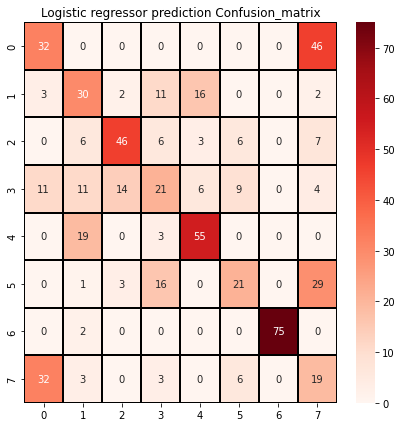

In [263]:
cm = confusion_matrix(y_test,pred_lr)
f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Reds")
plt.title("Logistic regressor prediction Confusion_matrix")

In [264]:
#  Random Forest Classifier

In [265]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(x_train,y_train)
pred_rfc = rfc.predict(x_test)

print("accuracy_score: ",accuracy_score(y_test, pred_rfc))
print("confusion_matrix: \n",confusion_matrix(y_test, pred_rfc))
print("classification_report: \n",classification_report(y_test,pred_rfc))

accuracy_score:  0.8877374784110535
confusion_matrix: 
 [[77  0  0  0  0  0  0  1]
 [ 1 45  2  5  6  0  1  4]
 [ 1  2 64  1  0  5  0  1]
 [ 3  6  3 50  5  1  0  8]
 [ 0  0  0  0 76  0  0  1]
 [ 0  0  0  0  0 67  0  3]
 [ 0  0  0  0  0  0 77  0]
 [ 2  1  0  1  0  0  1 58]]
classification_report: 
               precision    recall  f1-score   support

           0       0.92      0.99      0.95        78
           1       0.83      0.70      0.76        64
           2       0.93      0.86      0.90        74
           3       0.88      0.66      0.75        76
           4       0.87      0.99      0.93        77
           5       0.92      0.96      0.94        70
           6       0.97      1.00      0.99        77
           7       0.76      0.92      0.83        63

    accuracy                           0.89       579
   macro avg       0.89      0.88      0.88       579
weighted avg       0.89      0.89      0.88       579



In [267]:
#  Here we are getting 88% accuracy using RFC.

In [268]:
#  Confusion Matrix for RFC

Text(0.5, 1.0, 'RFC prediction Confusion_matrix')

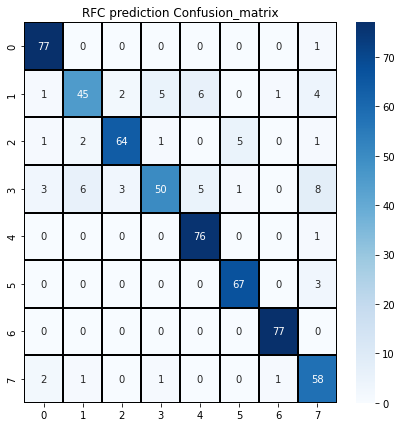

In [269]:
cm = confusion_matrix(y_test,pred_rfc)
f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Blues")
plt.title("RFC prediction Confusion_matrix")

In [270]:
# Decision Tree Classifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
pred_dtc = dtc.predict(x_test)

print("accuracy_score: ",accuracy_score(y_test, pred_dtc))
print("confusion_matrix: \n",confusion_matrix(y_test, pred_dtc))
print("classification_report: \n",classification_report(y_test,pred_dtc))

accuracy_score:  0.8497409326424871
confusion_matrix: 
 [[72  2  0  1  0  2  0  1]
 [ 3 43  4  6  5  0  1  2]
 [ 0  3 58  5  0  7  0  1]
 [ 3  9  5 50  3  1  0  5]
 [ 0  0  1  0 74  1  0  1]
 [ 0  2  4  0  0 62  0  2]
 [ 0  0  0  0  0  0 77  0]
 [ 2  2  0  2  0  0  1 56]]
classification_report: 
               precision    recall  f1-score   support

           0       0.90      0.92      0.91        78
           1       0.70      0.67      0.69        64
           2       0.81      0.78      0.79        74
           3       0.78      0.66      0.71        76
           4       0.90      0.96      0.93        77
           5       0.85      0.89      0.87        70
           6       0.97      1.00      0.99        77
           7       0.82      0.89      0.85        63

    accuracy                           0.85       579
   macro avg       0.84      0.85      0.84       579
weighted avg       0.85      0.85      0.85       579



In [271]:
#  Here we are getting 84% accuracy using DTC.

Text(0.5, 1.0, 'DTC prediction Confusion_matrix')

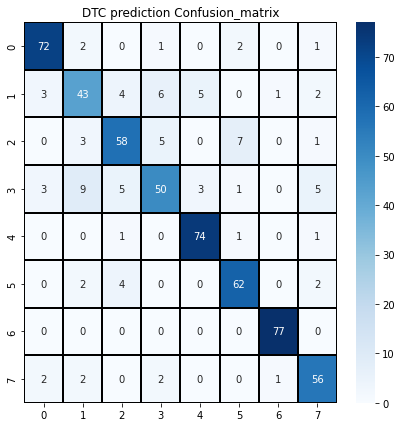

In [272]:
#  Confusion Matrix for DTC
cm = confusion_matrix(y_test,pred_dtc)
f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Blues")
plt.title("DTC prediction Confusion_matrix")

In [273]:
#  Support Vector Machine Classifier

In [274]:
svc = SVC(kernel='linear', gamma=3)
svc.fit(x_train,y_train)
pred_svc = svc.predict(x_test)

print("accuracy_score: ", accuracy_score(y_test, pred_svc))
print("confusion_matrix: \n", confusion_matrix(y_test, pred_svc))
print("classification_report: \n", classification_report(y_test,pred_svc))

accuracy_score:  0.6390328151986183
confusion_matrix: 
 [[78  0  0  0  0  0  0  0]
 [ 4 33  3 10 13  0  0  1]
 [ 2  6 44 11  0  8  0  3]
 [14 11 15 22  5  8  0  1]
 [ 0 17  0  3 57  0  0  0]
 [ 2  2  1  2  0 45  0 18]
 [ 0  2  0  0  1  0 74  0]
 [39  6  0  0  0  1  0 17]]
classification_report: 
               precision    recall  f1-score   support

           0       0.56      1.00      0.72        78
           1       0.43      0.52      0.47        64
           2       0.70      0.59      0.64        74
           3       0.46      0.29      0.35        76
           4       0.75      0.74      0.75        77
           5       0.73      0.64      0.68        70
           6       1.00      0.96      0.98        77
           7       0.42      0.27      0.33        63

    accuracy                           0.64       579
   macro avg       0.63      0.63      0.62       579
weighted avg       0.64      0.64      0.63       579



In [275]:
#  Here we are getting 63% accuracy using SVC.

In [276]:
#  Confusion Matrix for SVC

Text(0.5, 1.0, 'SVC prediction Confusion_matrix')

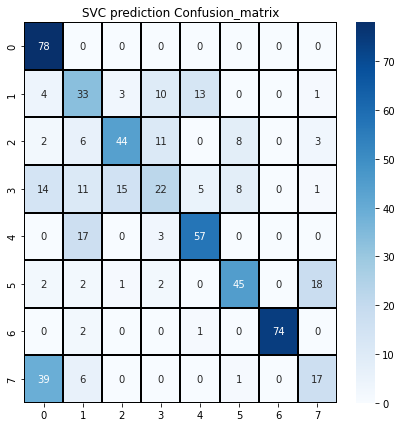

In [277]:
cm = confusion_matrix(y_test,pred_svc)
f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Blues")
plt.title("SVC prediction Confusion_matrix")

In [278]:
#  KNN Classifier

In [279]:
knn = KNN()
knn.fit(x_train,y_train)
pred_knn = knn.predict(x_test)

print("accuracy_score: ",accuracy_score(y_test, pred_knn))
print("confusion_matrix: \n",confusion_matrix(y_test, pred_knn))
print("classification_report: \n",classification_report(y_test,pred_knn))

accuracy_score:  0.8341968911917098
confusion_matrix: 
 [[77  0  0  0  0  0  0  1]
 [ 3 36  4  9  9  0  1  2]
 [ 1  0 60  3  1  8  0  1]
 [ 2 10  5 41  4  4  0 10]
 [ 0  0  1  0 76  0  0  0]
 [ 1  0  3  2  0 62  0  2]
 [ 0  0  0  0  0  0 76  1]
 [ 4  3  0  0  0  0  1 55]]
classification_report: 
               precision    recall  f1-score   support

           0       0.88      0.99      0.93        78
           1       0.73      0.56      0.64        64
           2       0.82      0.81      0.82        74
           3       0.75      0.54      0.63        76
           4       0.84      0.99      0.91        77
           5       0.84      0.89      0.86        70
           6       0.97      0.99      0.98        77
           7       0.76      0.87      0.81        63

    accuracy                           0.83       579
   macro avg       0.82      0.83      0.82       579
weighted avg       0.83      0.83      0.83       579



In [280]:
#  Here we are getting 83% accuracy using KNN.

Text(0.5, 1.0, 'KNN prediction Confusion_matrix')

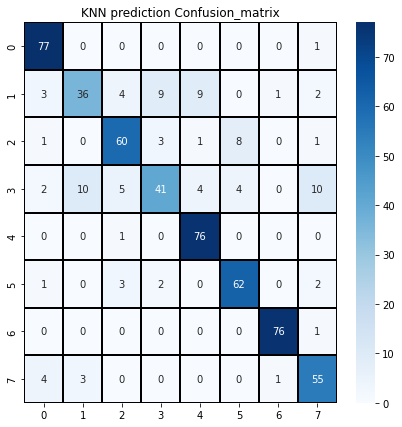

In [281]:
cm = confusion_matrix(y_test,pred_knn)
f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Blues")
plt.title("KNN prediction Confusion_matrix")

In [282]:
#  Gradient Boosting Classifier

In [283]:
gb = GradientBoostingClassifier(n_estimators =100,learning_rate=0.1, max_depth=4)
gb.fit(x_train,y_train)
pred_gb = gb.predict(x_test)

print("accuracy_score: ",accuracy_score(y_test, pred_gb))
print("confusion_matrix: \n",confusion_matrix(y_test, pred_gb))
print("classification_report: \n",classification_report(y_test,pred_gb))

accuracy_score:  0.8739205526770294
confusion_matrix: 
 [[73  3  0  0  0  0  0  2]
 [ 2 47  1  6  4  0  0  4]
 [ 1  1 63  3  0  5  0  1]
 [ 4  6  4 51  5  0  0  6]
 [ 0  1  1  1 73  1  0  0]
 [ 1  0  0  0  0 66  0  3]
 [ 0  0  0  0  0  0 76  1]
 [ 3  2  0  1  0  0  0 57]]
classification_report: 
               precision    recall  f1-score   support

           0       0.87      0.94      0.90        78
           1       0.78      0.73      0.76        64
           2       0.91      0.85      0.88        74
           3       0.82      0.67      0.74        76
           4       0.89      0.95      0.92        77
           5       0.92      0.94      0.93        70
           6       1.00      0.99      0.99        77
           7       0.77      0.90      0.83        63

    accuracy                           0.87       579
   macro avg       0.87      0.87      0.87       579
weighted avg       0.87      0.87      0.87       579



In [284]:
#  Here we are getting 87% accuracy using RFC.

In [285]:
#  Confusion Matrix for Gradient Boosting classifier

Text(0.5, 1.0, 'Gradient Boosting classifier prediction Confusion_matrix')

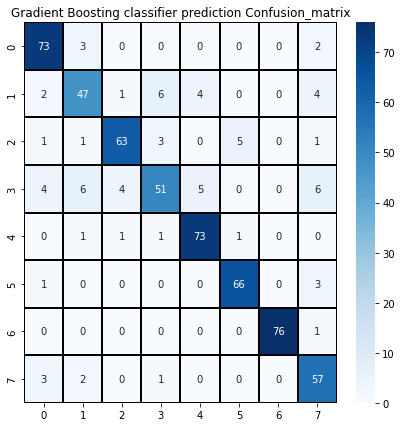

In [286]:
cm = confusion_matrix(y_test,pred_gb)
f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Blues")
plt.title("Gradient Boosting classifier prediction Confusion_matrix")

In [287]:
#  Cross Validation Score for all the Regression model
#  CV Score for Logistic Regression

In [288]:
print('CV score for Logistic Regression: ',cross_val_score(lr,x,y,cv=5).mean())

CV score for Logistic Regression:  0.5477154969382949


In [289]:
# CV Score for Random Forest Classifier

In [290]:
print('CV score for Random forest Classifier: ',cross_val_score(rfc,x,y,cv=5).mean())

CV score for Random forest Classifier:  0.8744714353004509


In [292]:
#  CV Score for Decision Tree Classifier
print('CV score for Decision Tree Classifier: ',cross_val_score(dtc,x,y,cv=5).mean())

CV score for Decision Tree Classifier:  0.8200148038490008


In [293]:
#  CV Score for Support Vector Classifier
print('CV score for Support Vector  Classifier: ',cross_val_score(svc,x,y,cv=5).mean())

CV score for Support Vector  Classifier:  0.6400228786757285


In [294]:
#  CV Score for KNN Classifier
print('CV score for KNN Classifier: ',cross_val_score(knn,x,y,cv=5).mean())

CV score for KNN Classifier:  0.8335024560931297


In [295]:
#  CV Score for Gradient Boosting Classifier
print('CV score for Gradient Boosting Classifier: ',cross_val_score(gb,x,y,cv=5).mean())

CV score for Gradient Boosting Classifier:  0.8459484556893884


From the observation of accuracy and cross validation score and their difference we can predict that Random Forest Classifier is the best model.

In [296]:
#  Hyper parameter tuning for best model using GridsearchCV

In [297]:
from sklearn.metrics import precision_score, recall_score, make_scorer

In [298]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .30, random_state = 42)

In [299]:
rfc=RandomForestClassifier(random_state=30)

In [300]:
grid_params = {
                'criterion':['gini','entropy'],
                'max_depth': [15,20,22],
                'n_estimators':[700,900,1000],
                'min_samples_leaf': [1]
                }

In [301]:
CV_rfc = GridSearchCV(RandomForestClassifier(), grid_params, cv = 5)

In [302]:
CV_rfc.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [15, 20, 22], 'min_samples_leaf': [1],
                         'n_estimators': [700, 900, 1000]})

In [303]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 22,
 'min_samples_leaf': 1,
 'n_estimators': 1000}

In [304]:
df = RandomForestClassifier(random_state=50, max_features='auto', n_estimators= 100, max_depth=8, criterion='gini')
df.fit(x_train, y_train)
pred = df.predict(x_test)
acc=accuracy_score(y_test,pred)
print("accuracy score: ",acc*100)

accuracy score:  81.34715025906736


In [305]:
# calculating the scores 
score = cross_val_score(rfc,x,y,cv=10,scoring="accuracy").mean()
print("confusion_matrix: \n",confusion_matrix(y_test,pred))
print("classification_report: \n",classification_report(y_test,pred))

confusion_matrix: 
 [[61  2  0  2  0  0  0  1]
 [ 2 35  7  4 11  4  0  6]
 [ 0  1 58  0  0  8  0  1]
 [ 3  1 18 34  2  2  0 10]
 [ 0  0  1  0 71  0  0  1]
 [ 0  0  1  0  0 73  0  4]
 [ 0  0  0  0  0  0 72  0]
 [15  1  0  0  0  0  0 67]]
classification_report: 
               precision    recall  f1-score   support

           0       0.75      0.92      0.83        66
           1       0.88      0.51      0.64        69
           2       0.68      0.85      0.76        68
           3       0.85      0.49      0.62        70
           4       0.85      0.97      0.90        73
           5       0.84      0.94      0.88        78
           6       1.00      1.00      1.00        72
           7       0.74      0.81      0.77        83

    accuracy                           0.81       579
   macro avg       0.82      0.81      0.80       579
weighted avg       0.82      0.81      0.80       579



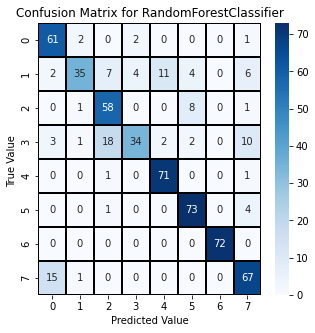

In [306]:
#  Confusion Matrix
cm = confusion_matrix(y_test, pred)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Blues")
plt.xlabel("Predicted Value")
plt.ylabel("True Value ")
plt.title('Confusion Matrix for RandomForestClassifier')
plt.show()

In [307]:
#  ROC-AUC Curve
fpr,tpr,thresholds = roc_curve(y_test,pred,pos_label=True)

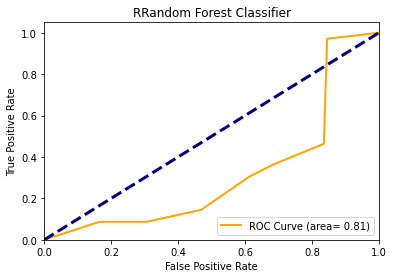

In [310]:
plt.figure()
plt.plot(fpr,tpr,color="orange",lw=2,label = "ROC Curve (area= %0.2f)" % acc)
plt.plot([0,1],[0,1],color="navy",lw=3,linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("RRandom Forest Classifier")
plt.legend(loc="lower right")
plt.show()

In [311]:
#This is the AUC-ROC curve for the models which is plotted False positive rate against True positive rate. So the model has the area under curve as 0.79.



In [312]:
# Saving the Classification Model

In [313]:
filename='Global_Power_Plant.pickle'
pickle.dump(CV_rfc,open(filename,'wb'))
loaded_model = pickle.load(open(filename, 'rb'))
loaded_model.predict(x_test)

array([2, 7, 0, 0, 3, 3, 4, 3, 2, 7, 2, 5, 7, 6, 2, 5, 3, 5, 0, 3, 4, 7,
       0, 3, 0, 5, 6, 1, 2, 7, 5, 2, 4, 4, 0, 3, 2, 5, 2, 6, 5, 5, 2, 7,
       6, 6, 2, 7, 6, 0, 0, 6, 2, 6, 4, 4, 0, 7, 7, 6, 3, 0, 6, 3, 1, 1,
       5, 3, 4, 4, 7, 0, 2, 5, 3, 1, 3, 3, 7, 1, 2, 4, 7, 4, 4, 5, 4, 3,
       0, 5, 4, 5, 2, 5, 3, 6, 0, 2, 4, 6, 1, 6, 4, 7, 6, 3, 7, 4, 2, 4,
       1, 2, 3, 1, 4, 3, 1, 4, 6, 4, 3, 6, 7, 0, 4, 6, 7, 5, 4, 3, 7, 7,
       6, 3, 4, 3, 7, 7, 7, 1, 0, 5, 5, 7, 0, 1, 6, 2, 5, 3, 6, 2, 7, 7,
       1, 5, 1, 4, 2, 5, 7, 6, 5, 5, 7, 5, 5, 7, 4, 7, 7, 0, 0, 3, 2, 0,
       0, 6, 2, 6, 6, 6, 3, 0, 1, 0, 7, 7, 3, 1, 5, 4, 7, 7, 0, 1, 0, 5,
       6, 3, 6, 7, 7, 3, 3, 7, 5, 4, 2, 4, 1, 5, 2, 2, 7, 7, 6, 7, 5, 0,
       6, 0, 3, 5, 4, 4, 2, 7, 3, 1, 4, 3, 1, 3, 1, 0, 4, 5, 0, 3, 6, 3,
       0, 6, 0, 6, 7, 1, 0, 4, 1, 2, 7, 4, 5, 6, 2, 4, 4, 5, 7, 7, 6, 0,
       4, 4, 5, 5, 7, 2, 1, 4, 4, 2, 7, 5, 5, 4, 7, 1, 4, 1, 3, 0, 7, 5,
       2, 1, 0, 1, 2, 4, 3, 0, 6, 2, 2, 2, 5, 5, 5,

In [314]:
#  Checking predicted and original values
a =np.array(y_test)
predicted=np.array(CV_rfc.predict(x_test))
Global_Power_Plant=pd.DataFrame({'Orginal':a,'Predicted':predicted}, index=range(len(a)))
Global_Power_Plant

,Orginal,Predicted
0,2,2
1,5,7
2,7,0
3,0,0
4,3,3
...,...,...
574,4,4
575,7,7
576,0,0
577,0,0


In [315]:
#Regression Model
# Target column is "capacity_mw"

In [316]:
#  Finding the best random state among all the models
maxAcc = 0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size = .30, random_state = i)
    modDTR =  DecisionTreeRegressor()
    modDTR.fit(x_train,y_train)
    pred = modDTR.predict(x_test)
    acc  = r2_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print(f"Best Accuracy is: {maxAcc} on random_state: {maxRS}")

Best Accuracy is: 0.7377754665624627 on random_state: 51


In [317]:
#  Best Accuracy is: 0.7377754665624627 on random_state: 51

In [318]:
#  Creating train-test-split

In [319]:
# creating new train test split using the random state.
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=.30,random_state=maxRS)

In [320]:
x1.shape, y1.shape

((855, 8), (855,))

In [321]:
x_train.shape,y_train.shape, x_test.shape,y_test.shape

((598, 8), (598,), (257, 8), (257,))

We can see the x.shape value is divided into x_train.shape and x_test.shape and like this y.shape is also divided.

Linear Regression

In [322]:
from sklearn.linear_model import LinearRegression

In [323]:
lr=LinearRegression()
lr.fit(x_train,y_train)
#prediction
pred_lr=lr.predict(x_test)

#checking R2 Score
print("R2 score: ", r2_score(y_test, pred_lr))
#checking Mean abs error
print("Mean abs error: ", mean_absolute_error(y_test, pred_lr))
#checking Mean squared error
print("Mean squared error: ",mean_squared_error(y_test,pred_lr))
#checking Root Mean squared error
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test,pred_lr)))

R2 score:  0.3813891119428654
Mean abs error:  0.6332315449863176
Mean squared error:  0.5793968041486528
Root Mean Squared Error:  0.7611811900911982


In [324]:
##   R2 score for Linear Regression is 38%

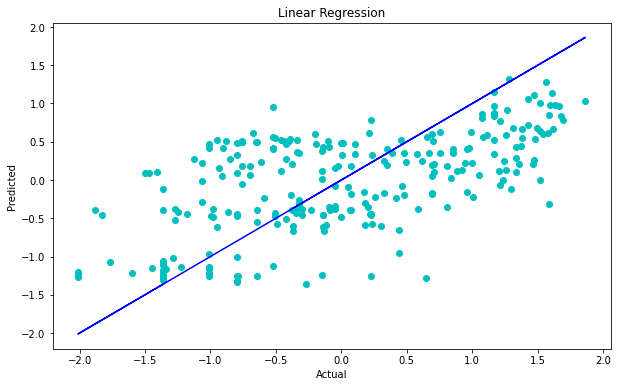

In [325]:
#  Checking the performance of the model by graph
#Verifying the performance of the model by graph
plt.figure(figsize=(10,6))
plt.scatter(x=y_test,y=pred_lr,color='c')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Linear Regression")
plt.show()

In [326]:
#  Random forest Regression Model
# Checking R2 score for Random Forest Regressor
RFR=RandomForestRegressor(n_estimators=600, random_state=28)
RFR.fit(x_train,y_train)
# prediction
pred_RFR=RFR.predict(x_test)

#printing R2 Score
print("R2 score: ", r2_score(y_test, pred_RFR))
#printing Mean abs error
print("Mean abs error: ", mean_absolute_error(y_test, pred_RFR))
#printing Mean squared error
print("Mean squared error: ", mean_squared_error(y_test,pred_RFR))
#printing Root Mean squared error
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test,pred_RFR)))

R2 score:  0.8041793818005436
Mean abs error:  0.3170798750882868
Mean squared error:  0.18340744167551673
Root Mean Squared Error:  0.42826095044437185


In [327]:
#  R2 score for Random forest Regression is 80%

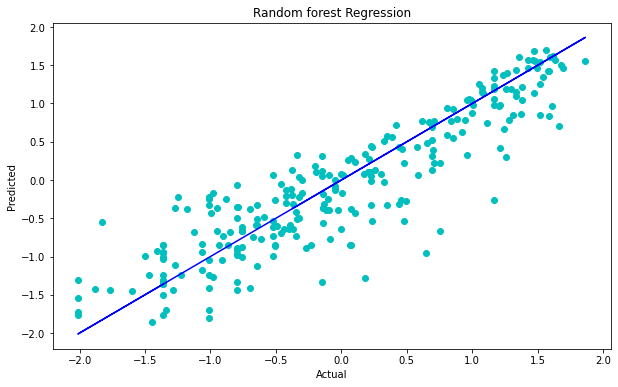

In [328]:
#  Checking the performance of the model by graph
#Verifying the performance of the model by graph
plt.figure(figsize=(10,6))
plt.scatter(x=y_test,y=pred_RFR,color='c')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Random forest Regression")
plt.show()

In [329]:
# KNN regressor
# Checking R2 score for KNN Regressor
knn=KNeighborsRegressor(n_neighbors=9 )
knn.fit(x_train,y_train)
# prediction
pred_knn=knn.predict(x_test)

#printing R2 Score
print("R2 score: ", r2_score(y_test, pred_knn))
#printing Mean abs error
print("Mean abs error: ", mean_absolute_error(y_test, pred_knn))
#printing Mean squared error
print("Mean squared error: ", mean_squared_error(y_test,pred_knn))
#printing Root Mean squared error
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test,pred_knn)))

R2 score:  0.6628934503418937
Mean abs error:  0.41496407176828454
Mean squared error:  0.3157371803508352
Root Mean Squared Error:  0.5619049566882599


In [330]:
#  R2 score for KNN regressor is 66%

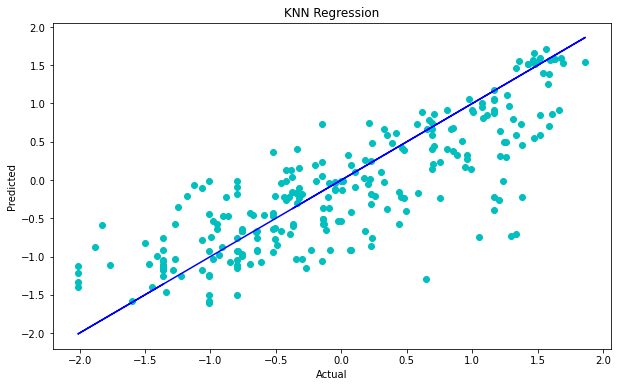

In [331]:
#  Checking the performance of the model by graph
#Verifying the performance of the model by graph
plt.figure(figsize=(10,6))
plt.scatter(x=y_test,y=pred_knn,color='c')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("KNN Regression")
plt.show()

In [332]:
#  Decision Tree Regressor
# Checking R2 score for Decision Tree Regressor 
DTR= DecisionTreeRegressor(random_state=29)
DTR.fit(x_train,y_train)
# prediction
pred_DTR=DTR.predict(x_test)

#printing R2 Score
print("R2 score: ", r2_score(y_test, pred_DTR))
#printing Mean abs error
print("Mean abs error: ", mean_absolute_error(y_test, pred_DTR))
#printing Mean squared error
print("Mean squared error: ", mean_squared_error(y_test,pred_DTR))
#printing Root Mean squared error
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test,pred_DTR)))

R2 score:  0.7242096832854734
Mean abs error:  0.37556024266181093
Mean squared error:  0.2583078170857917
Root Mean Squared Error:  0.5082399207911473


In [333]:
#  R2 score for Decision Tree Regressor is 72%

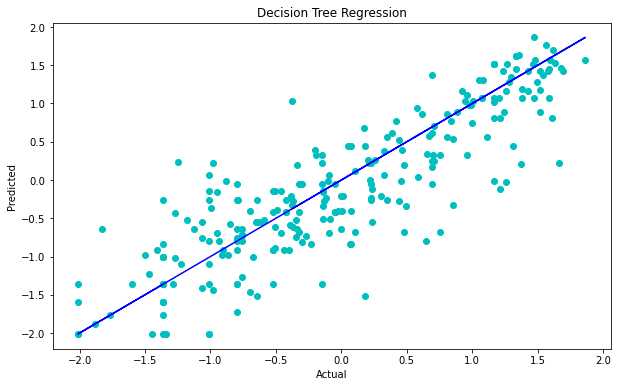

In [334]:
#  Checking the performance of the model by graph
#Verifying the performance of the model by graph
plt.figure(figsize=(10,6))
plt.scatter(x=y_test,y=pred_DTR,color='c')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Decision Tree Regression")
plt.show()

In [335]:
#  Gradient Boosting Regressor
# Checking R2 score for Gradient Boosting Regressor 
Gb= GradientBoostingRegressor(n_estimators=400,  random_state=29, learning_rate=0.1, max_depth=3)
Gb.fit(x_train,y_train)
# prediction
pred_Gb=Gb.predict(x_test)

#printing R2 Score
print("R2 score: ", r2_score(y_test, pred_Gb))
#printing Mean abs error
print("Mean abs error: ", mean_absolute_error(y_test, pred_Gb))
#printing Mean squared error
print("Mean squared error: ", mean_squared_error(y_test,pred_Gb))
#printing Root Mean squared error
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test,pred_Gb)))

R2 score:  0.7942999341925201
Mean abs error:  0.3239161818197563
Mean squared error:  0.19266062567429923
Root Mean Squared Error:  0.4389312311448107


In [336]:
#  R2 score for Gradient Boosting Regressor is 79%

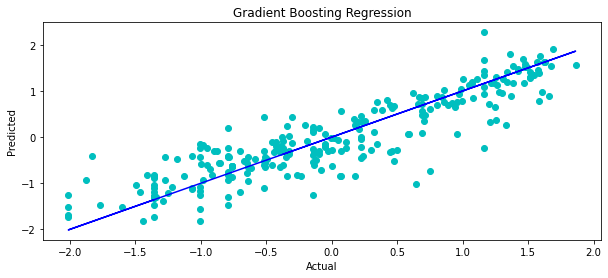

In [337]:
#  Checking the performance of the model by graph
#Verifying the performance of the model by graph
plt.figure(figsize=(10,4))
plt.scatter(x=y_test,y=pred_Gb,color='c')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Gradient Boosting Regression")
plt.show()


In [338]:
#  Ridge Regressor
paramRidge = {'alpha':[0.01,0.1,1.0,10.26],'solver':['auto','svd','cholesky','lsqr','sparse_cg','sag','saga']}
ridge = Ridge()
clf = GridSearchCV(ridge,paramRidge)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 10.26, 'solver': 'saga'}


In [339]:
# Checking R2 score for Ridge Regressor
ridge=Ridge(alpha=10.26,solver='sag')
ridge.fit(x_train,y_train)
ridge.score(x_train,y_train)
# prediction
pred_ridge=ridge.predict(x_test)

#printing R2 Score
print("R2 score: ", r2_score(y_test, pred_ridge))
#printing Mean abs error
print("Mean abs error: ", mean_absolute_error(y_test, pred_ridge))
#printing Mean squared error
print("Mean squared error: ", mean_squared_error(y_test,pred_ridge))
#printing Root Mean squared error
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test,pred_ridge)))

R2 score:  0.3838832788693377
Mean abs error:  0.6332305280174678
Mean squared error:  0.5770607438333389
Root Mean Squared Error:  0.7596451433619114


In [341]:
#  R2 score for Ridge regressor is 38%

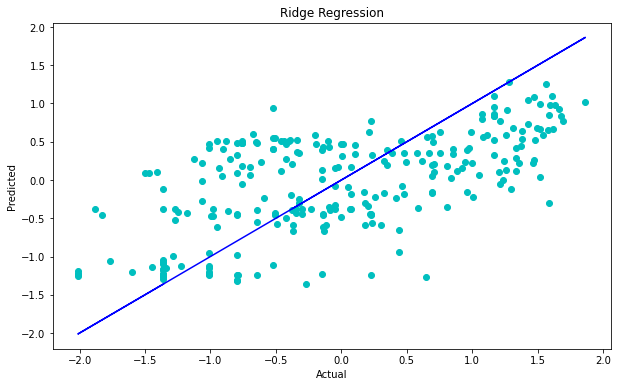

In [342]:
#  Checking the performance of the model by graph
#Verifying the performance of the model by graph
plt.figure(figsize=(10,6))
plt.scatter(x=y_test,y=pred_ridge,color='c')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Ridge Regression")
plt.show()

In [343]:
#Checking Cross Validation Score of Models
#Checking CV score for Linear Regression
print('The CV score  for Linear_regression is :',cross_val_score(lr,x1,y1,cv=7).mean())

The CV score  for Linear_regression is : 0.36959611879353244


In [344]:
# Checking CV score for Random Forest Regression
print("The CV  score for  the Random forest regressor is:",cross_val_score(RFR,x1,y1,cv=7).mean())

The CV  score for  the Random forest regressor is: 0.7598217588302921


In [345]:
# Checking CV score for KNN Regression
print('The CV score  for  the KNN regressor is :',cross_val_score(knn,x1,y1,cv=7).mean())

The CV score  for  the KNN regressor is : 0.6582345484949522


In [346]:
# Checking CV score for DTR
print('The CV score  for  the DTR is :',cross_val_score(DTR,x1,y1,cv=7).mean())

The CV score  for  the DTR is : 0.629934252844218


In [347]:
# Checking CV score for GBR Regression
print('The CV score  for  the GBR regressor is :',cross_val_score(Gb,x1,y1,cv=7).mean())

The CV score  for  the GBR regressor is : 0.7657168982028256


In [348]:
#  Checking CV score for Ridge Regression
print('The CV score  for  the Ridge regressor is :',cross_val_score(ridge,x1,y1,cv=7).mean())

The CV score  for  the Ridge regressor is : 0.37025420615992344


From the observation of R2 Score and cross validation score and their difference we can predict that Random Forest Regressor is the best model.

Hyper Parameter Tuning
The Random Forest Regressor with GridsearchCV

In [349]:
parameter = {'n_estimators':[30,60,80],'max_depth': [10,20,40],
             'min_samples_leaf':[5,10,20],'min_samples_split':[5,10],
             'criterion':['mse','mae'],'max_features':["auto","sqrt","log2"]}

In [350]:
GridCV = GridSearchCV(RandomForestRegressor(),parameter,cv=5,n_jobs = -1,verbose = 1)

In [351]:
Best_model_Regressor = RandomForestRegressor(n_estimators = 60,criterion = 'mse', max_depth= 20, max_features = 'auto',min_samples_leaf = 5, min_samples_split = 10)
Best_model_Regressor.fit(x_train,y_train)

RandomForestRegressor(criterion='mse', max_depth=20, max_features='auto',
                      min_samples_leaf=5, min_samples_split=10,
                      n_estimators=60)

In [352]:
#prediction
pred = Best_model_Regressor.predict(x_test)
#Accuracy score
acc = r2_score(y_test,pred_RFR)
print(acc*100)

80.41793818005436


In [353]:
#  So, after the Hypertuning now we got a accuracy score of 80% on Random Forest Regression

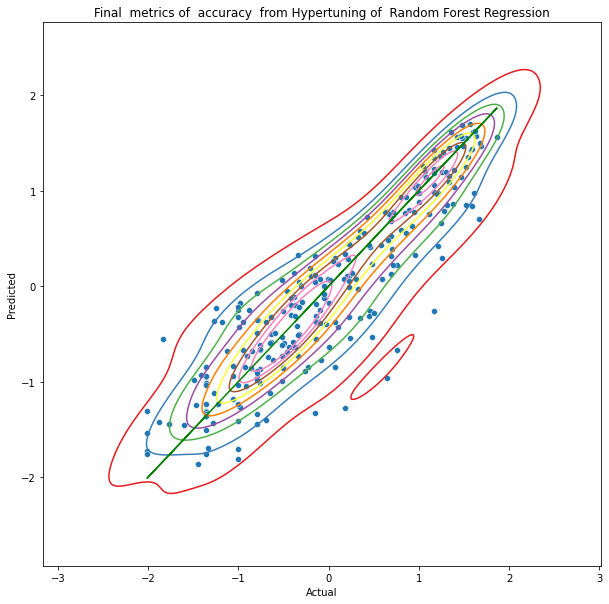

In [354]:
#Verifying the final  performance of the model by graph
plt.figure(figsize=(10,10))
sns.scatterplot(x=y_test,y=pred_RFR,palette='Set2')
sns.kdeplot(x=y_test,y=pred_RFR, cmap='Set1')
plt.plot(y_test,y_test,color='g')
#Verifying the performance of the model by graph
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Final  metrics of  accuracy  from Hypertuning of  Random Forest Regression")
plt.show()

In [355]:
#  Saving The Predictive Regressor Model
#saving the model at local file system
filename='Global_Power_Plant_Database_Project.pickle'
pickle.dump(Best_model_Regressor,open(filename,'wb'))
#prediction using the saved model
loaded_model_r = pickle.load(open(filename, 'rb'))
loaded_model_r.predict(x_test)

array([-1.17949912e+00, -1.51426112e+00, -7.25347089e-01,  1.00697885e+00,
       -9.10579104e-01,  9.44986638e-01, -4.88122721e-01,  1.57529636e+00,
        1.66072392e-02,  1.28859346e+00, -1.78978641e-01,  8.69140576e-02,
       -5.02594430e-01, -1.55609478e+00, -7.62697945e-01, -9.76131545e-01,
       -1.29110714e-01, -3.63538874e-01,  4.36295241e-03,  1.68970883e+00,
        1.26006322e+00,  1.52433637e+00,  1.54282225e+00,  1.77391642e-01,
       -8.42117989e-01, -7.78082730e-01, -1.19253555e+00, -8.15813321e-01,
        9.72103295e-01, -6.66531218e-01,  5.07805144e-01, -7.38705899e-01,
        1.69844630e+00,  2.23552148e-01,  8.26477042e-01, -1.08882440e+00,
        2.54546862e-02, -1.31468486e+00, -8.44010642e-01, -7.63848138e-01,
        1.10255125e-01, -7.85457228e-01, -6.91969307e-02,  7.69800335e-01,
       -2.72005841e-01,  4.93409370e-02, -8.52755001e-01,  1.60875207e+00,
        1.61408324e-01,  9.96873345e-02,  6.72502753e-01,  2.75010092e-01,
       -1.39530970e+00, -

In [356]:
# Prediction of Regressor Model
import numpy as np
a = np.array(y_test)
predicted = np.array(Best_model_Regressor.predict(x_test))
Global_Power_Plant_Database_Project = pd.DataFrame({"Original":a,"Predicted":predicted},index= range(len(a)))
Global_Power_Plant_Database_Project

,Original,Predicted
0,-1.360579,-1.179499
1,-2.012556,-1.514261
2,-0.510387,-0.725347
3,1.336721,1.006979
4,-1.064196,-0.910579
...,...,...
252,1.164966,1.051492
253,-1.598870,-1.567776
254,-1.411487,-1.080651
255,-1.360579,-1.372655


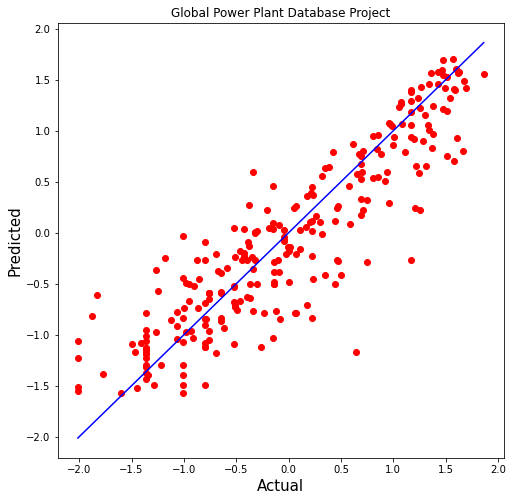

In [358]:
# Let's plot and visualize
plt.figure(figsize=(8,8))
plt.scatter(y_test,predicted,c='r')
plt1 = max(max(predicted),max(y_test))
plt2 = min(min(predicted),min(y_test))
plt.plot([plt1,plt2],[plt1,plt2],'b-')
plt.xlabel('Actual',fontsize=15)
plt.ylabel('Predicted',fontsize=15)
plt.title("Global Power Plant Database Project")
plt.show()